# NADILA IMAARAH / 2 D4 SAINS DATA TERAPAN A

# **WEEK 4 REGRESI DATA FUEL CONSUMPTION RATINGS**

# 1. EDA

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import scipy.stats as stats
import sklearn.metrics as skm
import math

**ANALISIS**
di sini saya meimpor beberapa library yang akan saya gunakan untuk analisis lanjutan pada tahap berikutnya

**Membaca dataset**

In [223]:
df = pd.read_csv('Fuel_Consumption_Ratings.csv')
df

,Model Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption,Fuel Consumption Comb_mpg,CO2 Emissions,CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
951,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
952,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
953,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


**ANALISIS**
di sini saya menampilkan dataset yang akan saya gunakan untuk regresi. Dataset yang saya gunakan terdiri dari beberapa fitur yakni :               
 1   Make                      
 2   Model                      
 3   Vehicle Class             
 4   Engine Size               
 5   Cylinders                 
 6   Transmission              
 8   Fuel Consumption City     
 9   Fuel Consumption Hwy                                                           
 10  Fuel Consumption           
 11  Fuel Consumption Comb_mpg    
 12  CO2 Emissions              
 13  CO2 Rating                 
 14  Smog Rating

**Menampilkan ukuran data**

In [224]:
print(df.shape)
df.head()


(955, 15)


,Model Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption,Fuel Consumption Comb_mpg,CO2 Emissions,CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


**ANALISIS**
disini saya menampilkan ukuran dataset yang akan digunakan, ukuran data ini berukuran 955,15

**Menampilkan tipe data**

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Model Year                 955 non-null    int64  
 1   Make                       955 non-null    object 
 2   Model                      955 non-null    object 
 3   Vehicle Class              955 non-null    object 
 4   Engine Size                955 non-null    float64
 5   Cylinders                  955 non-null    int64  
 6   Transmission               955 non-null    object 
 7   Fuel                       955 non-null    object 
 8   Fuel Consumption City      955 non-null    float64
 9   Fuel Consumption Hwy       955 non-null    float64
 10  Fuel Consumption           955 non-null    float64
 11  Fuel Consumption Comb_mpg  955 non-null    int64  
 12  CO2 Emissions              955 non-null    int64  
 13  CO2 Rating                 955 non-null    int64  

**ANALISIS**
disini saya menampilkan informasi dari setiap fitur  dimana akan menampilkan type data dari setiap fitur dan menampilkan apakah data yang memiliki nilai null namun berdasarkan output tidak ada fitur yang memiliki nilai null

**Menampilkan statistiks deskrptif**

In [226]:
df.describe()

,Model Year,Engine Size,Cylinders,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption,Fuel Consumption Comb_mpg,CO2 Emissions,CO2 Rating,Smog Rating
count,955.0,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,2022.0,3.204188,5.684817,12.548377,9.400628,11.131728,27.158115,260.110995,4.519372,4.947644
std,0.0,1.369863,1.934496,3.459582,2.305053,2.888651,7.686134,64.780198,1.477430,1.674629
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,214.000000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.300000,9.200000,10.900000,26.000000,258.000000,4.000000,5.000000
75%,2022.0,4.000000,6.000000,14.700000,10.700000,13.000000,31.000000,302.500000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


**ANALISIS**
Pada tahap ini saya menampilkan statistic deskripstif dan didapatkan bahwa :
1. Fitur Engine Size memiliki rata-rata 3.2 dengan standar deviasi 1.37, yang menunjukkan bahwa variasi fitur ini cukup besar. Selain itu, nilai minimum yang dimiliki adalah 1.2, sedangkan nilai maksimum mencapai 8.0, yang berarti skala nilai di fitur ini cukup luas.
2. Fitur Cylinders memiliki rata-rata 5.7 dengan standar deviasi 1.93, yang menunjukkan adanya variasi jumlah silinder antar kendaraan. Nilai minimum fitur ini adalah 3, sedangkan nilai maksimum mencapai 16, yang menunjukkan perbedaan signifikan antara kendaraan dengan mesin kecil dan kendaraan dengan mesin berperforma tinggi.
3. Fitur Fuel Consumption City memiliki rata-rata 12.5 L/100 km dengan standar deviasi 3.46, yang menunjukkan bahwa konsumsi bahan bakar kendaraan di dalam kota cukup bervariasi. Nilai minimum konsumsi bahan bakar adalah 4.0 L/100 km, sedangkan nilai maksimum mencapai 30.3 L/100 km, yang menandakan adanya kendaraan yang sangat hemat hingga kendaraan yang sangat boros bahan bakar.
4. Fitur Fuel Consumption Hwy memiliki rata-rata 9.4 L/100 km dengan standar deviasi 2.31, yang menunjukkan bahwa konsumsi bahan bakar di jalan tol lebih stabil dibandingkan di dalam kota. Nilai minimum fitur ini adalah 3.9 L/100 km, sedangkan nilai maksimum mencapai 20.9 L/100 km, yang berarti beberapa kendaraan sangat hemat, sementara yang lain masih boros meskipun di jalan tol.
5. Fitur Fuel Consumption Comb memiliki rata-rata 11.1 L/100 km dengan standar deviasi 2.89, menunjukkan variasi konsumsi bahan bakar gabungan yang cukup signifikan. Nilai minimum yang dimiliki fitur ini adalah 4.0 L/100 km, sedangkan nilai maksimum mencapai 26.1 L/100 km, yang menunjukkan adanya kendaraan dengan efisiensi bahan bakar tinggi serta kendaraan yang boros
6. Fitur Fuel Consumption Comb_mpg memiliki rata-rata 27.2 mpg dengan standar deviasi 7.69, yang menunjukkan perbedaan efisiensi bahan bakar antar kendaraan cukup besar. Nilai minimum fitur ini adalah 11 mpg, sedangkan nilai maksimum mencapai 71 mpg, yang berarti terdapat kendaraan yang sangat boros hingga yang sangat hemat bahan bakar.
7. Fitur CO2 Emissions memiliki rata-rata 260 g/km dengan standar deviasi 64.78, yang menunjukkan adanya variasi besar dalam emisi karbon kendaraan. Nilai minimum fitur ini adalah 94 g/km, sedangkan nilai maksimum mencapai 608 g/km, yang menunjukkan perbedaan signifikan antara kendaraan ramah lingkungan dan kendaraan dengan emisi tinggi
8. Fitur CO2 Rating memiliki rata-rata 4.5 dengan standar deviasi 1.48, yang menunjukkan bahwa sebagian besar kendaraan berada di kategori menengah dalam emisi karbon. Nilai minimum fitur ini adalah 1, sedangkan nilai maksimum mencapai 10, yang berarti terdapat kendaraan dengan emisi sangat rendah hingga kendaraan dengan emisi sangat tinggi.
9. Fitur Smog Rating memiliki rata-rata 4.9 dengan standar deviasi 1.67, yang menunjukkan variasi tingkat polusi kendaraan cukup besar. Nilai minimum fitur ini adalah 1, sedangkan nilai maksimum mencapai 7

**Menampilkan Missing Value**

In [227]:
df.isnull().sum()

Model Year                   0
Make                         0
Model                        0
Vehicle Class                0
Engine Size                  0
Cylinders                    0
Transmission                 0
Fuel                         0
Fuel Consumption City        0
Fuel Consumption Hwy         0
Fuel Consumption             0
Fuel Consumption Comb_mpg    0
CO2 Emissions                0
CO2 Rating                   0
Smog Rating                  0
dtype: int64

**ANALISIS**
koding ini mengecek apakah ada nilai null dari setiap fitur. Berdasarkan output tidak ditemukan fitur yang memiliki nilai null

**Visualisasi Variabel Target CO2 EMISSIONS**

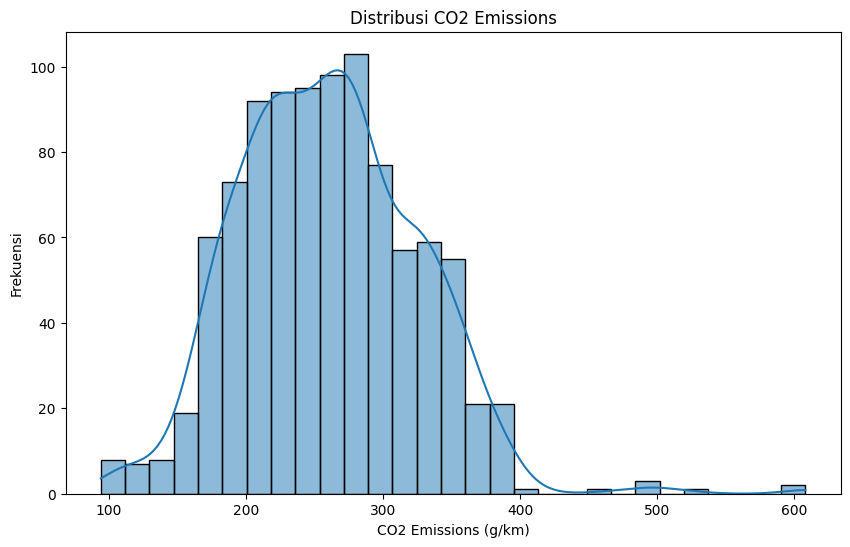

In [228]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CO2 Emissions'], kde=True)
plt.title('Distribusi CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frekuensi')
plt.show()

**ANALISIS**
Disini saya melihat distribusi dari label atau target didapatkan bahwa Distribusi CO2 Emissions terlihat condong ke kanan (skewed right), yang berarti sebagian besar kendaraan memiliki emisi CO2 dalam rentang yang lebih rendah hingga sedang. Histogram menunjukkan bahwa sebagian besar kendaraan memiliki CO2 Emissions berkisar antara 200 hingga 300 g/km, dengan frekuensi tertinggi berada di sekitar 250 g/km

**Visualisasi Korelasi antar variabel dengan Heatmap**

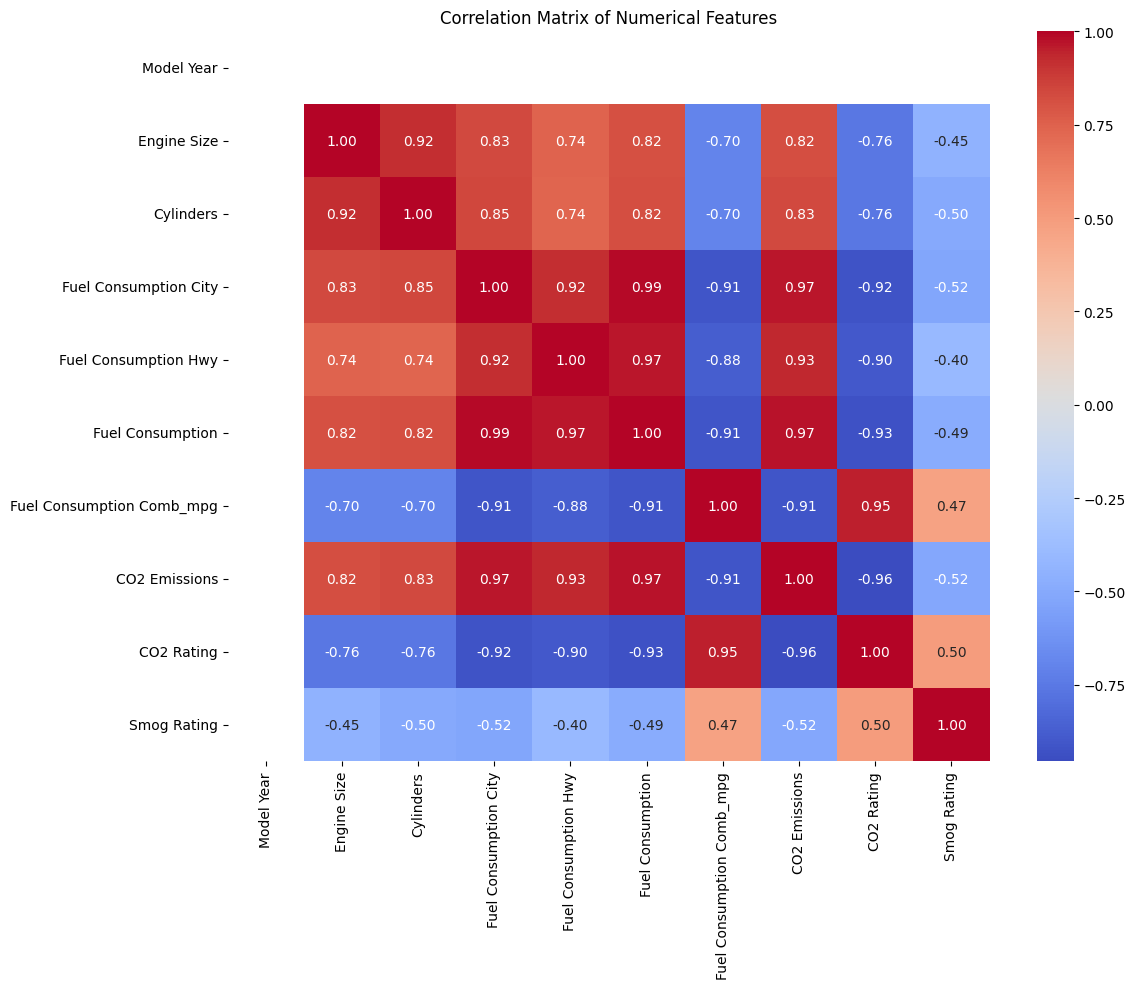

In [229]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Heatmap korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

**ANALISIS**

Pada tahap ini saya menampilkan heatmap untuk menunjukkan korelasi masing-masing fitur dan didapatkan bahwa :
1. Engine Size dan Cylinders berkorelasi sebesar (0.92): menunjukkan bahwa kendaraan dengan mesin lebih besar cenderung memiliki lebih banyak silinder
2. Fuel Consumption City dan Fuel Consumption Hwy berkorelasi sebesar (0.92) : menunjukkan bahwa kendaraan yang boros di dalam kota juga cenderung boros di jalan raya.
3. Fuel Consumption dan CO2 Emissions berkorelasi sebesar (0.97) : menunjukkan bahwa menunjukkan bahwa kendaraan yang lebih boros cenderung lebih berpolusi.
4. Fuel Consumption Comb_mpg dan CO2 Rating berkorelasi sebesar (0.95) : menunjukkan bahwa efisiensi bahan bakar yang baik akan memiliki emisi yang lebih rendah.
5. CO2 Emissions dan CO2 Rating berkorelasi negatif  sebesar(-0.96) : Semakin tinggi emisi CO2, semakin rendah rating emisinya, yang menunjukkan bahwa kendaraan yang lebih ramah lingkungan memiliki emisi yang lebih rendah.
6. CO2 Emissions dan Smog Rating berkorelasi negatif sebesar(-0.52): Kendaraan dengan emisi CO2 tinggi juga cenderung memiliki rating smog yang lebih rendah
7. Engine Size dan Fuel Consumption City berkorelasi sebesar (0.83): Kendaraan dengan mesin lebih besar cenderung lebih boros dalam konsumsi bahan bakar di dalam kota.
8. Fuel Consumption Hwy dan Fuel Consumption Comb_mpg berkorelasi sebesar (-0.88): Kendaraan yang lebih boros di jalan raya memiliki efisiensi bahan bakar keseluruhan yang lebih buruk.
9. Cylinders dan CO2 Rating berkorelasi negatif sebesar (-0.76): Kendaraan dengan lebih banyak silinder cenderung memiliki rating emisi CO2 yang lebih rendah
10. Smog Rating dan CO2 Rating berkorelasi sebesar (0.50): Kendaraan dengan rating emisi CO2 yang lebih baik juga cenderung memiliki rating smog yang lebih tinggi

**Visualisasi korelasi fitur enginesize degan co2emissions**

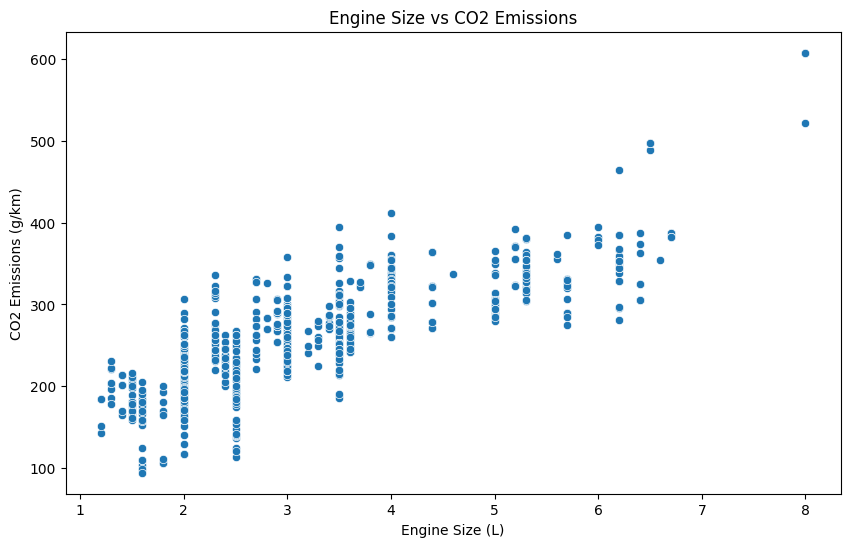

In [230]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Size', y='CO2 Emissions', data=df)
plt.title('Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

**ANALISIS**

Pada tahap ini saya menampilkan scatterplot untuk menunjukkan korelasi fitur engine size dengan fitur co2 emissions dan didapatkan bahwa :
1. Scatterplot ini adanya hubungan positif antara Engine Size dengan CO2 emissions,artinya semakin besar ukuran mesin kendaraan, semakin tinggi emisi CO2 yang dihasilkan
2. Seiring dengan bertambahnya Engine Size, emisi CO2 juga meningkat



**Visualisasi korelasi fitur cylinders degan co2emissions**

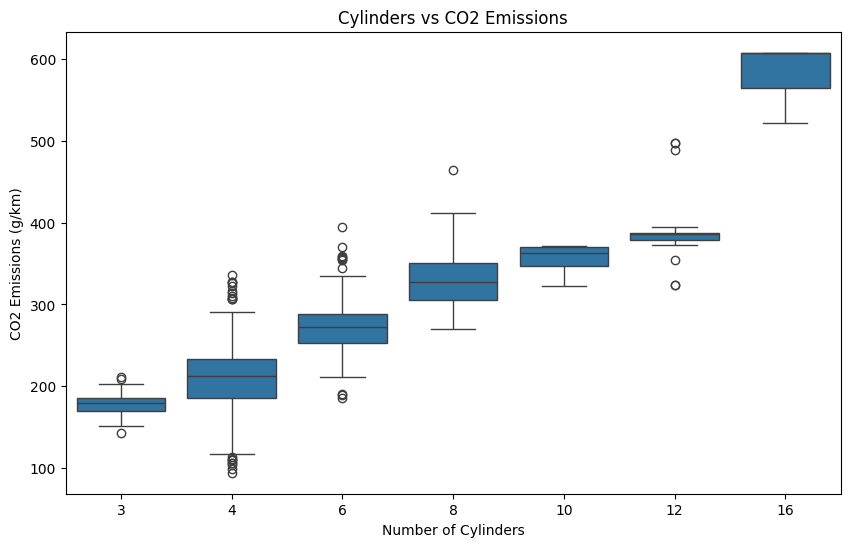

In [231]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cylinders', y='CO2 Emissions', data=df)
plt.title('Cylinders vs CO2 Emissions')
plt.xlabel('Number of Cylinders')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

**ANALISIS**

Pada tahap ini saya menampilkan boxplot untuk menunjukkan distribusi fitur Cylinders dengan fitur co2 emissions dan didapatkan bahwa :
1. semakin banyak Cylinders, semakin tinggi CO2 Emissions
2. Mesin dengan 3 atau 4 Cylinders memiliki emisi yang lebih rendah dibandingkan mesin dengan 8 atau lebih Cylinders.
3. Beberapa kategori silinder memiliki outlier, yang menunjukkan kendaraan dengan emisi jauh lebih tinggi dari rentang lainnya



**Visualisasi korelasi fitur fuel type degan co2emissions**

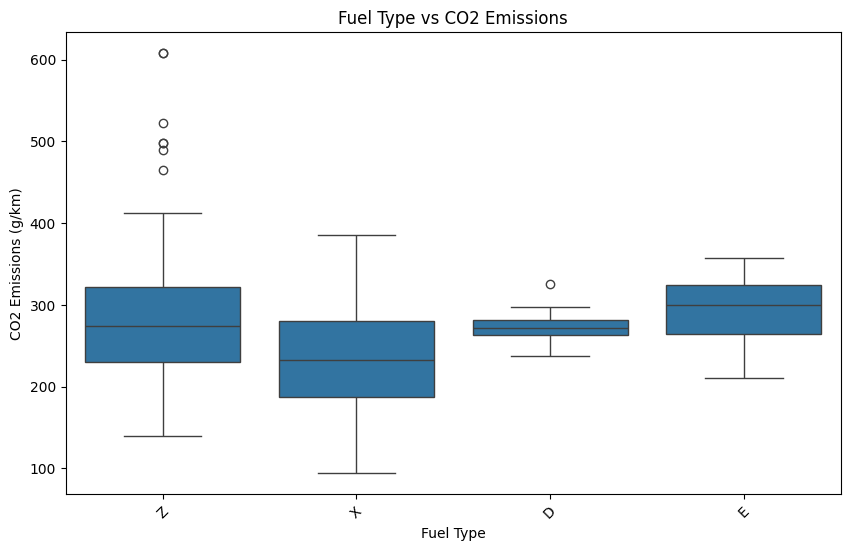

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel', y='CO2 Emissions', data=df)
plt.title('Fuel Type vs CO2 Emissions')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()

**ANALISIS**

Pada tahap ini saya menampilkan boxplot untuk menunjukkan distribusi fitur fuel type dengan fitur co2 emissions dan didapatkan bahwa :
1. Setiap jenis Fuel memiliki distribusi emisi CO2 yang berbeda.
2. Jenis bahan bakar pertama : Memiliki rentang emisi yang luas, dari sekitar 150 g/km hingga lebih dari 600 g/km.Terdapat data outlier
3. Jenis bahan bakar kedua :  Distribusi emisi lebih rendah dibandingkan jenis pertama.
4. Jenis bahan bakar ketiga : Memiliki rentang emisi yang lebih kecil
5. Jenis bahan bakar keempat : Memiliki distribusi emisi yang mirip dengan jenis pertama, tetapi dengan variasi lebih kecil.

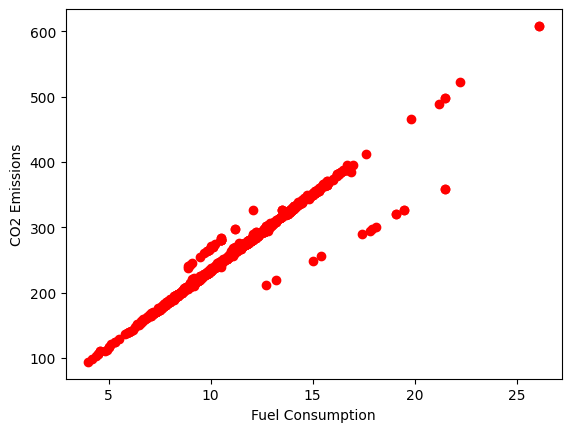

In [233]:
# Plot fitur Fuel Consumption dengan CO2 Emission
plt.scatter(df['Fuel Consumption'], df['CO2 Emissions'], color='red')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.show()

**ANALISIS**


Pada tahap ini saya menampilkan scatter plot  untuk menunjukkan hubungan antara Fuel Consumption dengan fitur co2 emissions dan didapatkan bahwa :
1. Grafik menunjukkan bahwa ada hubungan positif antara Fuel Consumption dan CO2 Emissions.
2. Semakin tinggi Fuel Consumption, semakin tinggi pula CO2 Emissions
3. Kendaraan dengan Fuel Consumption di atas 20 menghasilkan CO2 Emissions yang sangat tinggi (di atas 500 g/km).


# 3. SPLIT DATASET

# **Linear Regression Univariate**

In [234]:
# Memisahkan fitur dan target
X = df.drop(columns=['CO2 Emissions'])
y = df['CO2 Emissions']

**ANALISIS**
Karena study case ini untuk regresi maka di sini saya pisahkan dataset antara variabel independen dan variabel dependen

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**ANALISIS**

disini saya membagi dataset menjadi 2 metode yakni untuk data tes sebesar 30% dari dataset keseluruhan dan 70% sisanya untuk data train

In [236]:
print("Ukuran Data Train:", X_train.shape)
print("Ukuran Data Test:", X_test.shape)

Ukuran Data Train: (668, 14)
Ukuran Data Test: (287, 14)


# 4. FEATURE ENGGINRENING

In [237]:
from sklearn.preprocessing import LabelEncoder

**A. ENCODING**

In [238]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom kategorikal
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Inisialisasi LabelEncoder untuk setiap kolom kategorikal
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()

    # Fit hanya dengan data dari X_train
    X_train[col] = le.fit_transform(X_train[col])

    # Buat mapping kategori -> angka
    classes = dict(zip(le.classes_, le.transform(le.classes_)))

    # Transform X_test dengan kategori yang dikenal, yang tidak dikenal jadi -1
    X_test[col] = X_test[col].map(lambda x: classes.get(x, -1))  # Gunakan -1 jika tidak dikenal

    # Simpan encoder untuk referensi
    label_encoders[col] = le

# Cek hasil encoding
print("Contoh hasil encoding X_train:")
print(X_train.head())

print("\nContoh hasil encoding X_test:")
print(X_test.head())


Contoh hasil encoding X_train:
     Model Year  Make  Model  Vehicle Class  Engine Size  Cylinders  \
737        2022    31    231              6          3.8          6   
696        2022    29    239              8          3.0          6   
212        2022     9    449              6          5.3          8   
79         2022     4     74              2          4.4          8   
148        2022     8    103              0          2.7          4   

     Transmission  Fuel  Fuel Consumption City  Fuel Consumption Hwy  \
737            12     2                   13.7                  10.6   
696             3     3                   11.4                   9.3   
212             0     2                   16.8                  12.4   
79             11     3                   13.9                   9.6   
148             7     3                   12.0                   8.4   

     Fuel Consumption  Fuel Consumption Comb_mpg  CO2 Rating  Smog Rating  
737              12.3            

**ANALISIS**

Pada tahap pertama di feature enginering saya ini lakukan encoding pada fitur yang kategorik agar berubah menjadi numerik, untuk encoding ini saya menggunakan label encoder

**B. FEATURE SELECTION**

In [239]:
# Hitung korelasi antara fitur dan target
correlations = X_train.corrwith(y_train).abs()  # Menggunakan nilai absolut
high_corr_features = correlations[correlations > 0.3].index  # Ambil fitur dengan korelasi > 0.3

# Pastikan ada fitur yang memenuhi syarat
if len(high_corr_features) == 0:
    raise ValueError("Tidak ada fitur dengan korelasi tinggi terhadap target.")

# Simpan hasil seleksi langsung ke X_train dan X_test
X_train = X_train[high_corr_features]
X_test = X_test[high_corr_features]

# Menampilkan hasil seleksi fitur
print("Fitur terpilih berdasarkan korelasi:", list(high_corr_features))
print("\nX_train setelah encoding dan feature selection:")
print(X_train.head())
print("\nX_test setelah encoding dan feature selection:")
print(X_test.head())

Fitur terpilih berdasarkan korelasi: ['Engine Size', 'Cylinders', 'Transmission', 'Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption', 'Fuel Consumption Comb_mpg', 'CO2 Rating', 'Smog Rating']

X_train setelah encoding dan feature selection:
     Engine Size  Cylinders  Transmission  Fuel Consumption City  \
737          3.8          6            12                   13.7   
696          3.0          6             3                   11.4   
212          5.3          8             0                   16.8   
79           4.4          8            11                   13.9   
148          2.7          4             7                   12.0   

     Fuel Consumption Hwy  Fuel Consumption  Fuel Consumption Comb_mpg  \
737                  10.6              12.3                         23   
696                   9.3              10.4                         27   
212                  12.4              14.8                         19   
79                    9.6            

C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


**ANALISIS**

Pada tahap ini saya melakukan feature selection dimana saya akan memilih dan menggunakan beberapa fitur yang memiliki korelasi tinggi saja terhadap target. Fitur yang di pilih haru memiliki korelasi yang lebih besar dari 0.3 dengan target. Berdasarkan output fitur yang lolos dari feature selection ini yakni Engine Size, Cylinders, Transmission, Fuel Consumption City, Fuel Consumption Hwy, Fuel Consumption, Fuel Consumption Comb_mpg,  CO2 Rating, Smog Rating

**C. HANDLING DUPLICATE DATA**

In [240]:
# Hapus duplikasi di X_train dan sesuaikan y_train
X_train = X_train.drop_duplicates()
y_train = y_train.loc[X_train.index]


**ANALISIS**

Pada tahap ini saya akan meghapus data yang duplikat

**D. MENGECEK DATA OUTLIER**

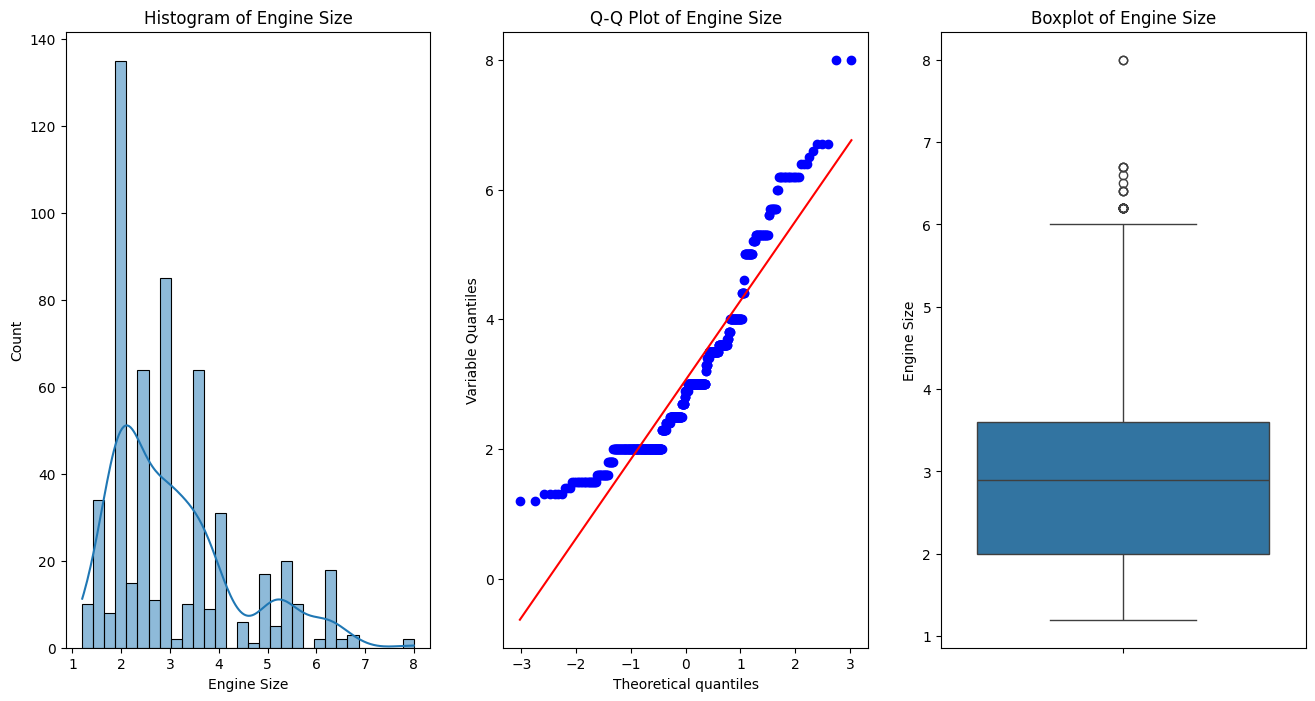

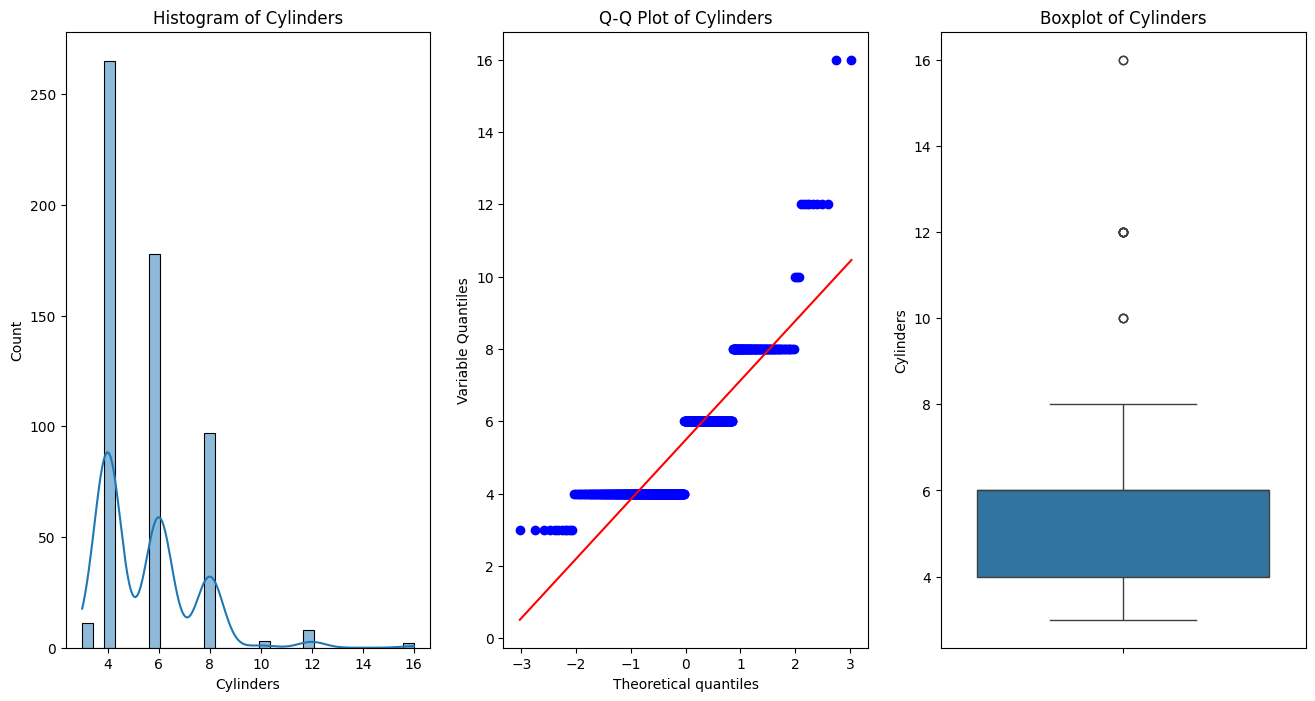

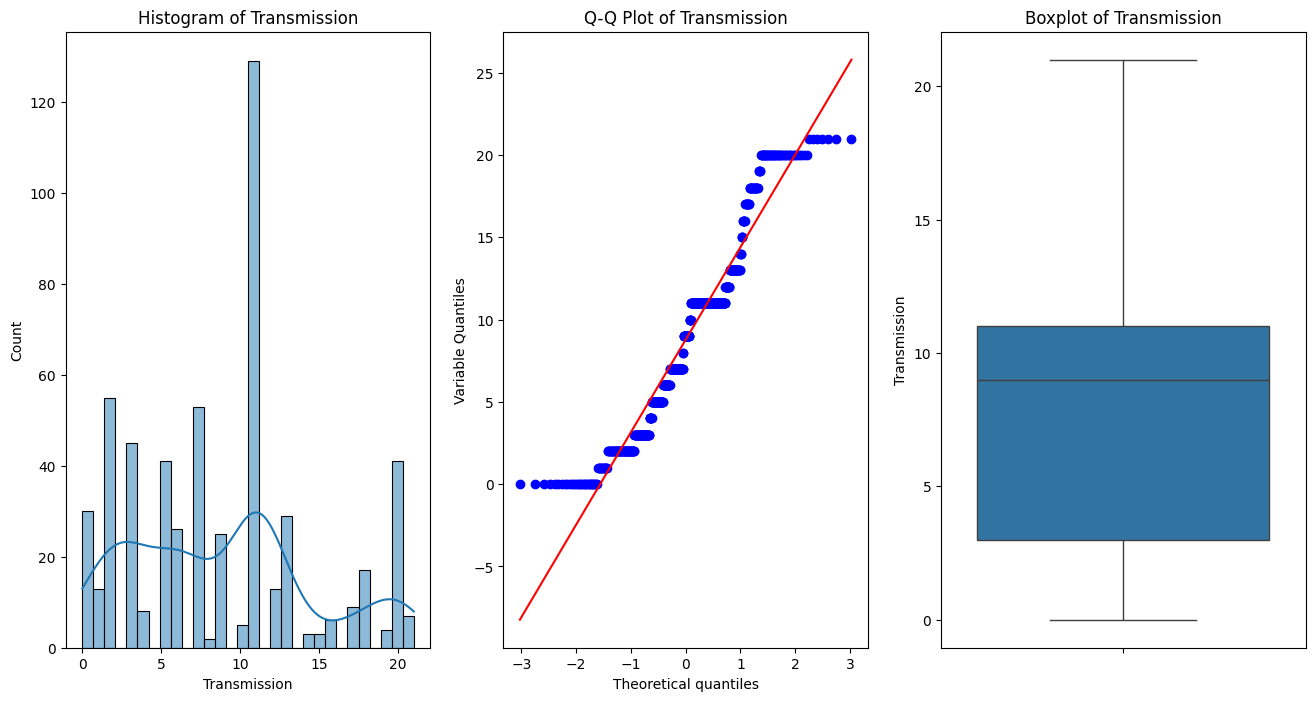

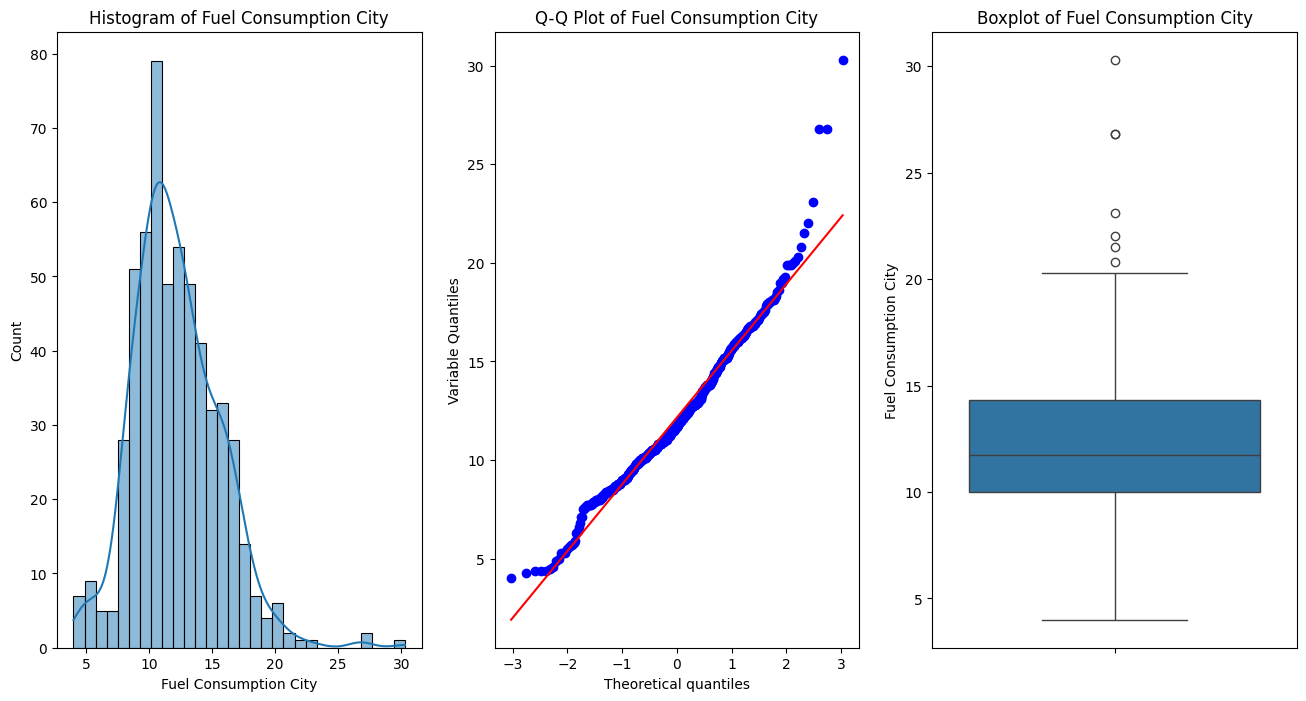

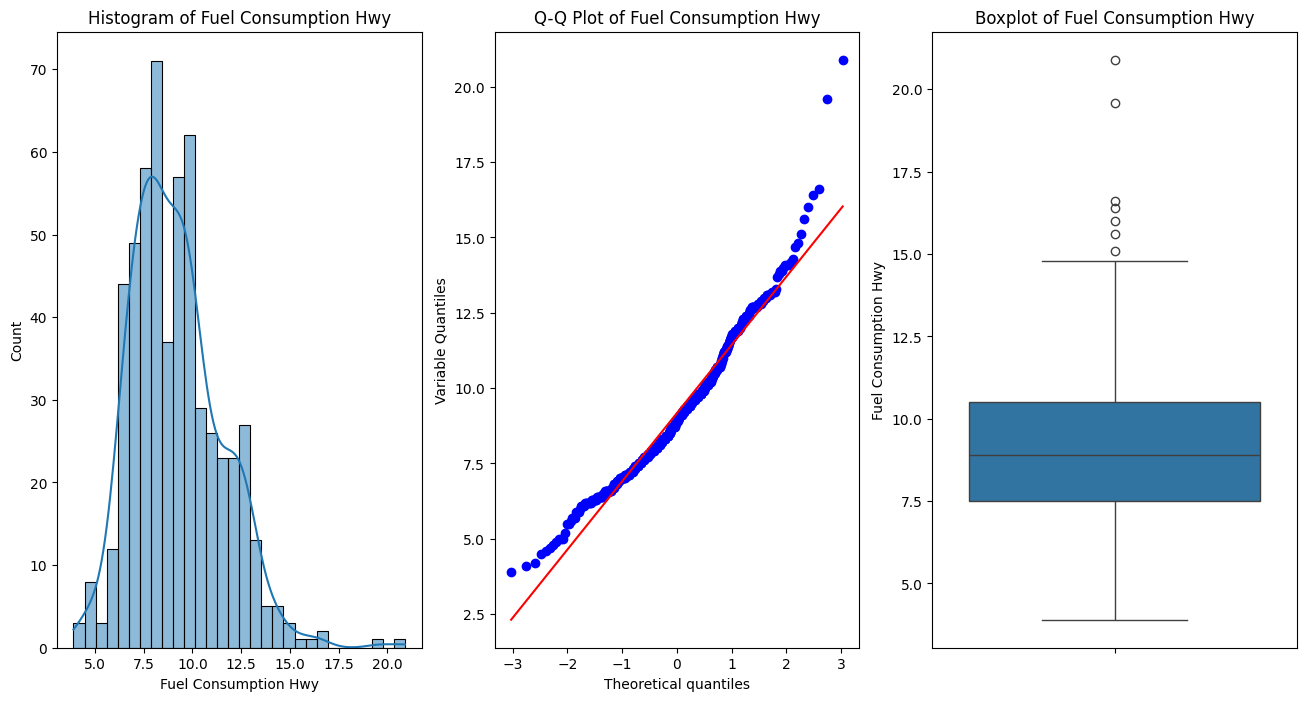

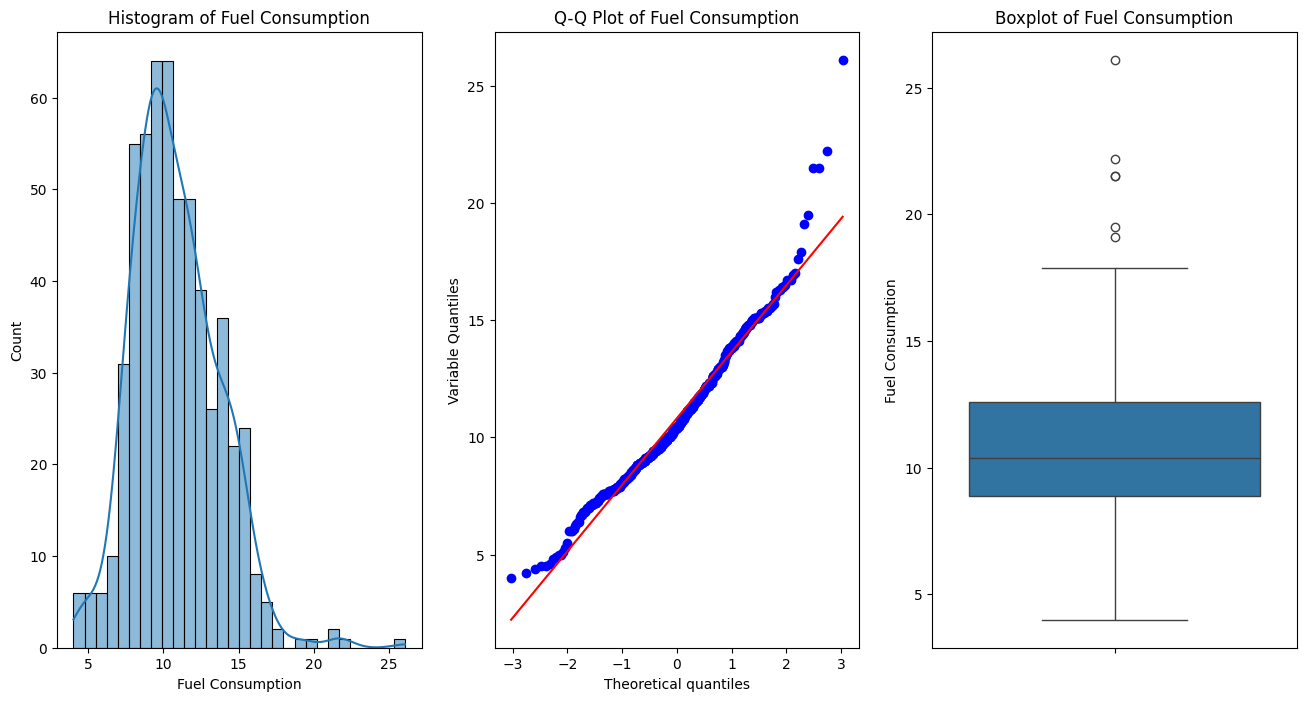

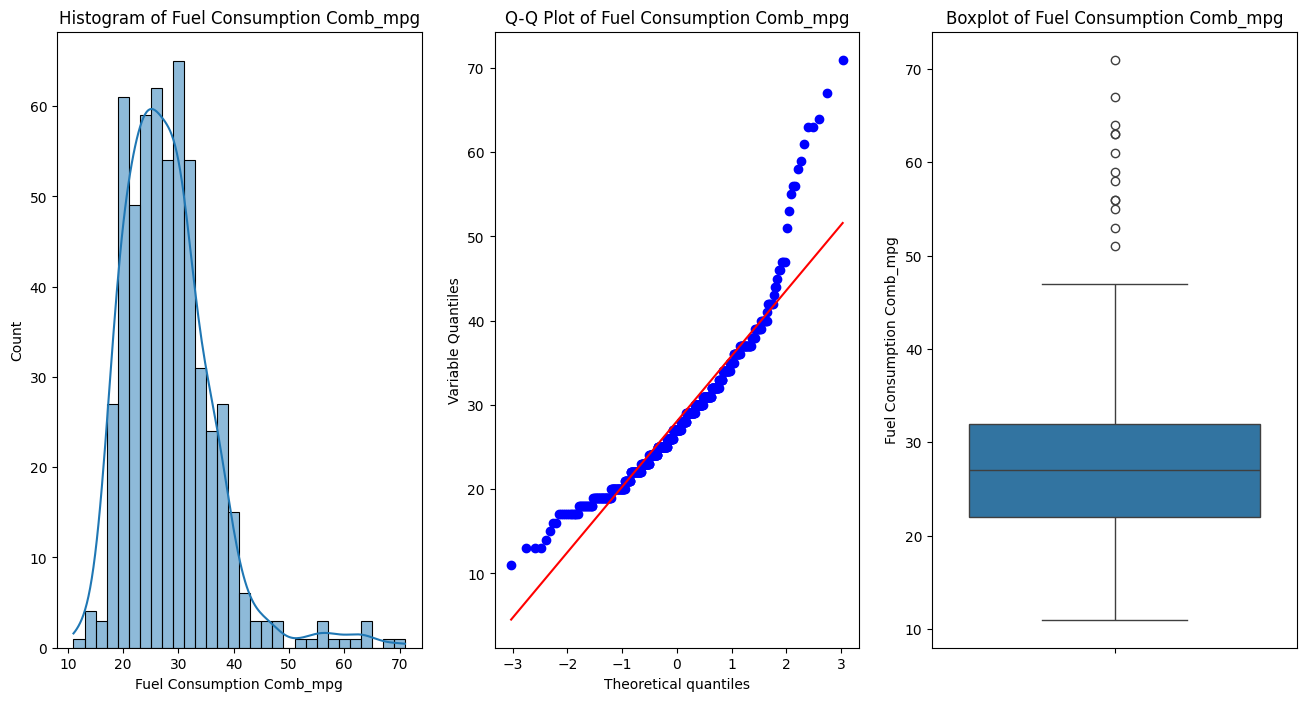

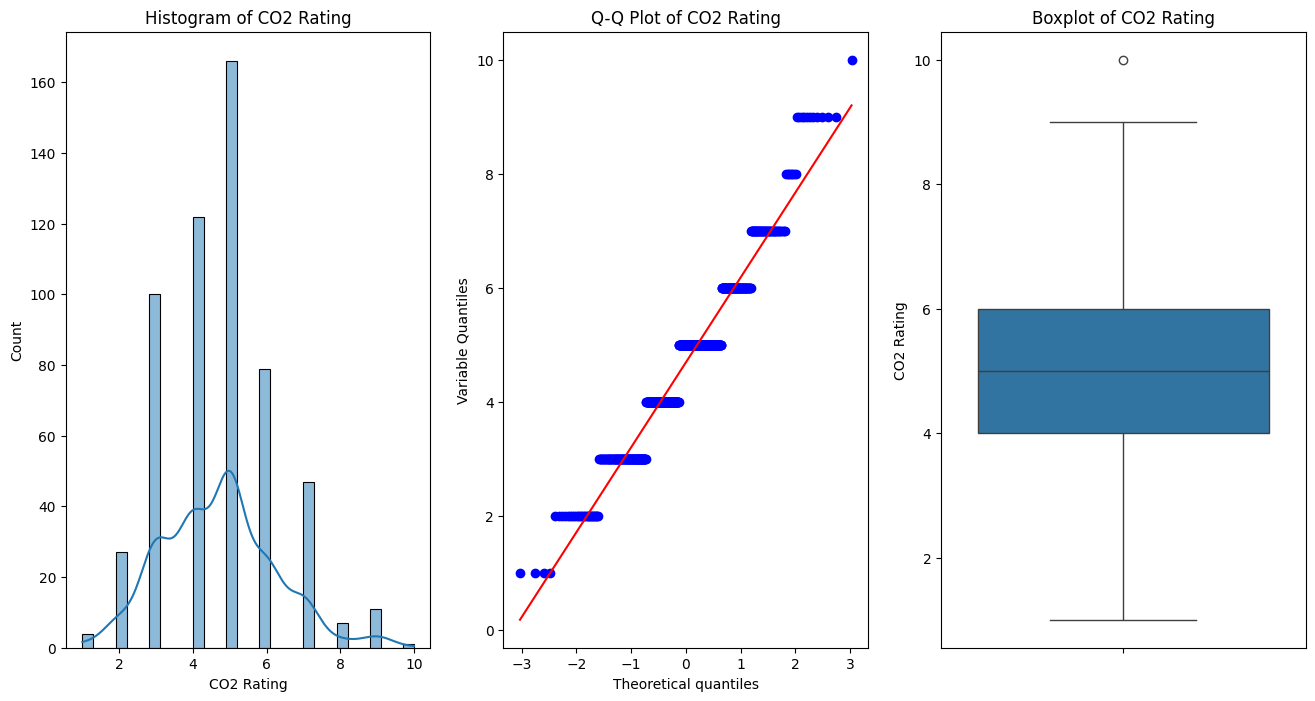

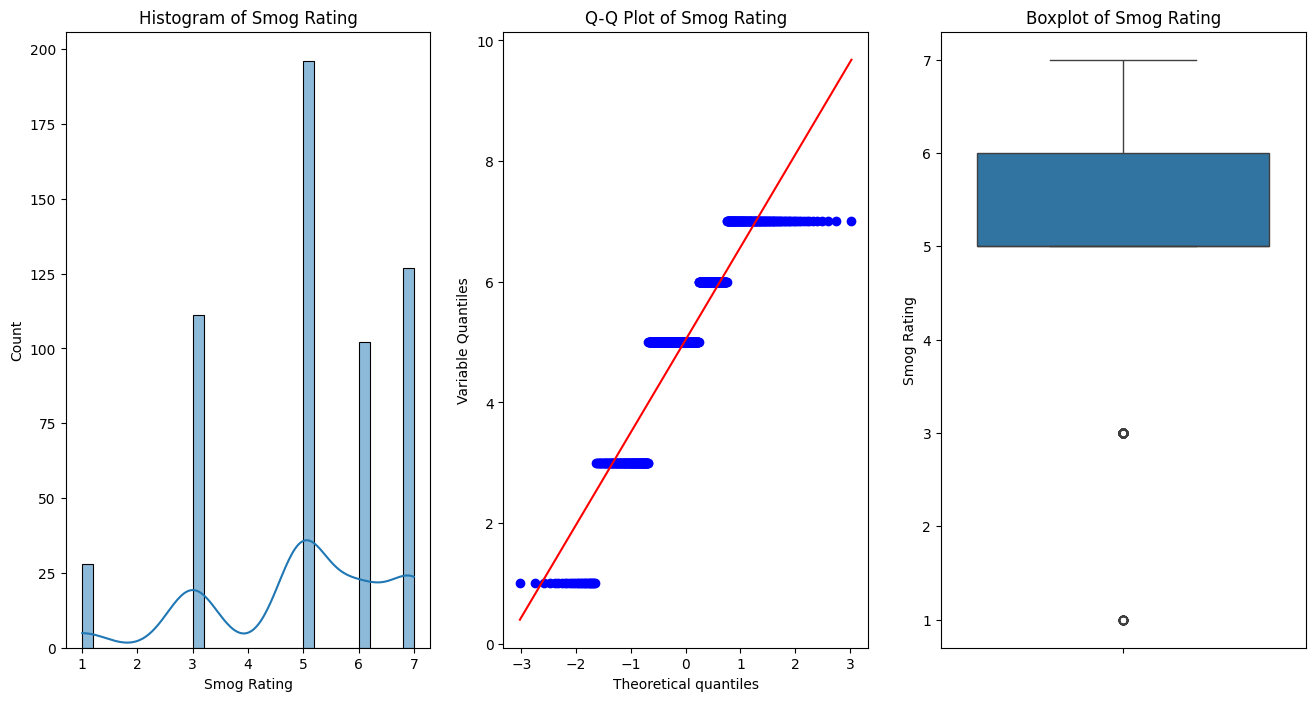

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def check_plot(df, variable):
    plt.figure(figsize=(16, 8))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title(f'Histogram of {variable}')

    # Q-Q Plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable Quantiles')
    plt.title(f'Q-Q Plot of {variable}')

    # Box Plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title(f'Boxplot of {variable}')

    plt.show()

# Pastikan hanya kolom numerik yang ada di X_train setelah duplikasi dihapus
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Menampilkan grafik untuk setiap fitur numerik yang tersedia dalam X_train
for feature in numeric_cols:
    check_plot(X_train, feature)


**ANALISIS**

Pada tahap ini saya menampilkan data outlier pada setiap fitur yang telah lolos seleksi. Dapat di lihat bahwa fitur yangmemiliki data outlier yakni terdiri dari engine size, cylinders, fuel consumption city, fuel consumption city hwy,fuel consumption, fuel consumption comb_mpg, co2 rating dan smog rating


**HANDLING DATA OUTLIER**

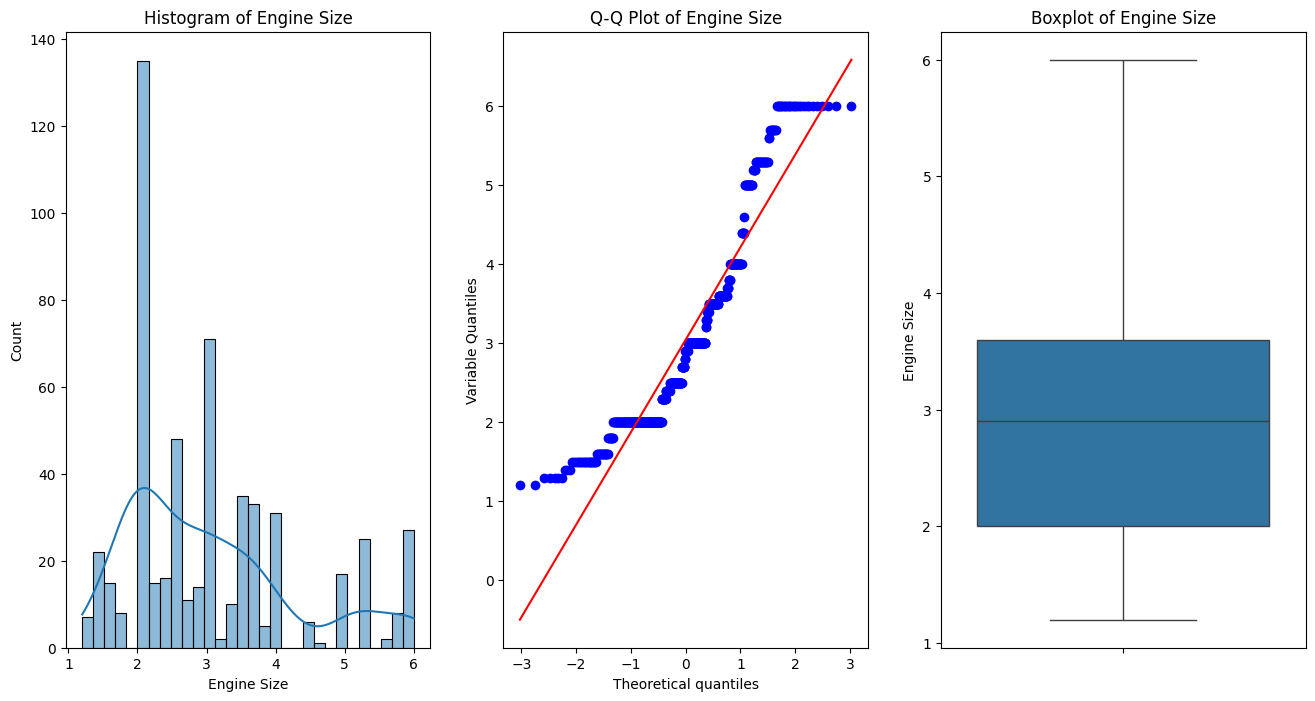

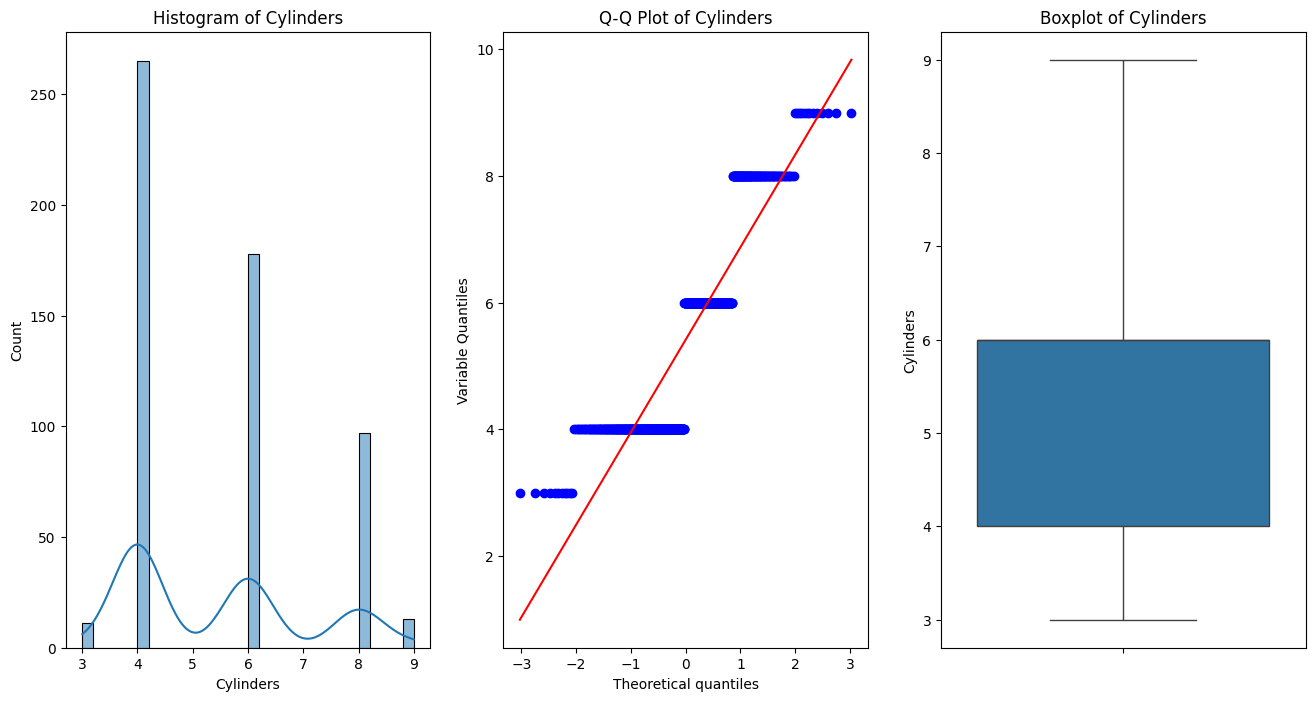

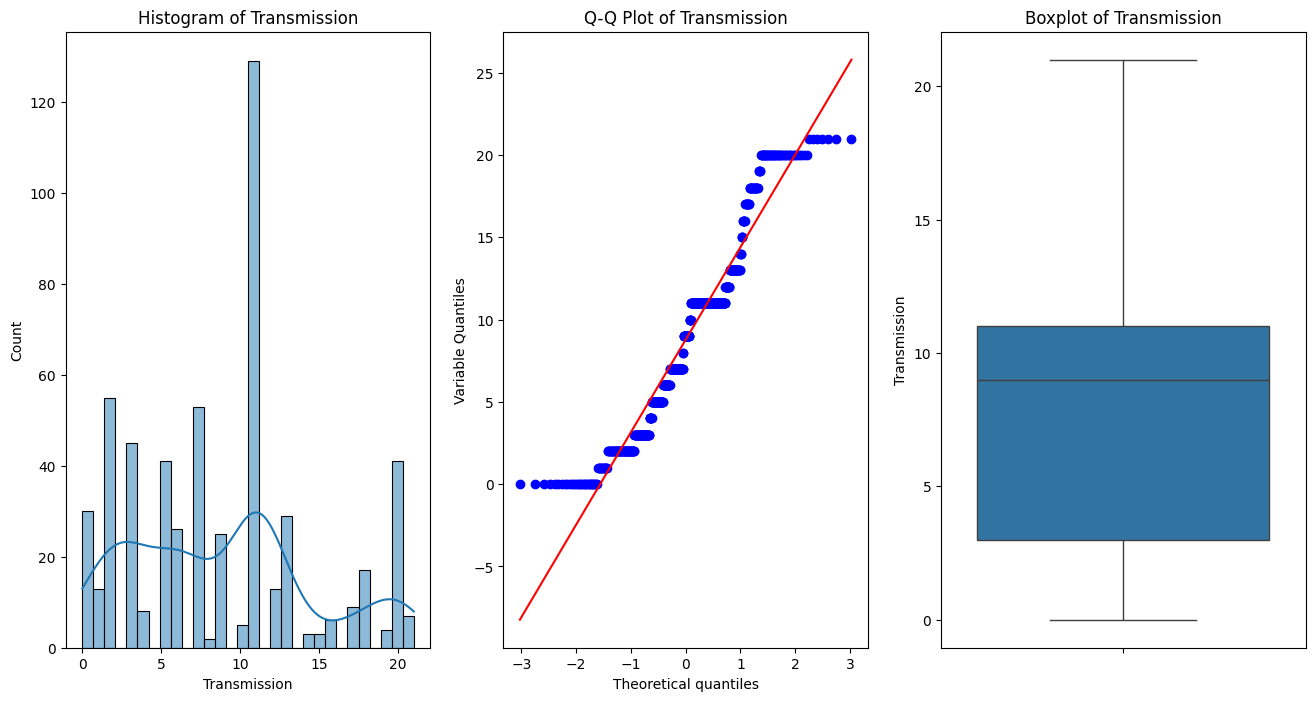

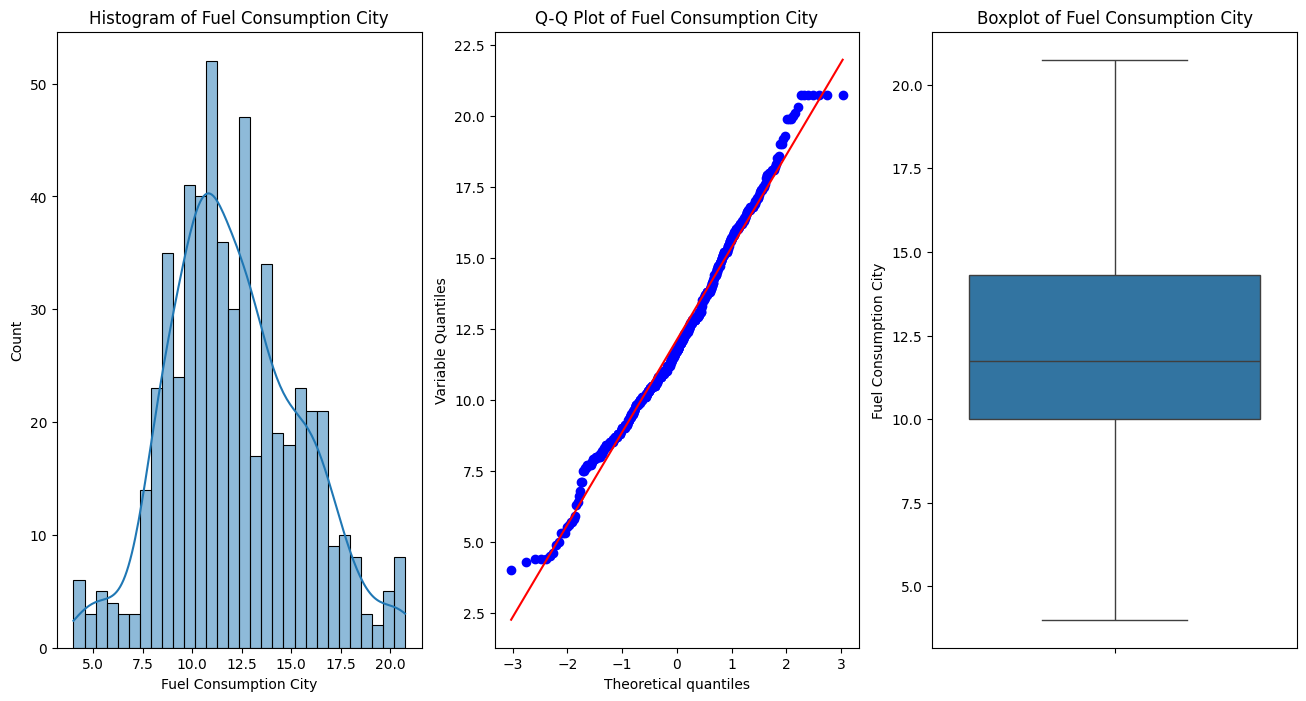

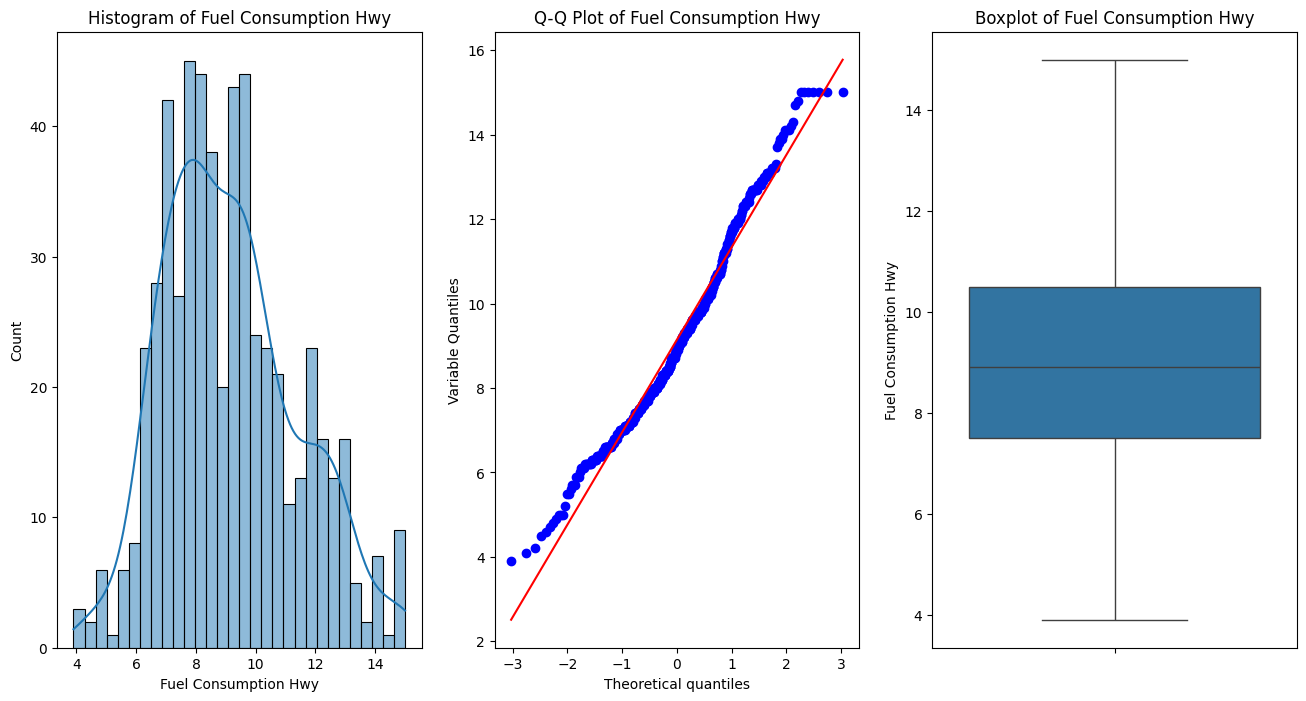

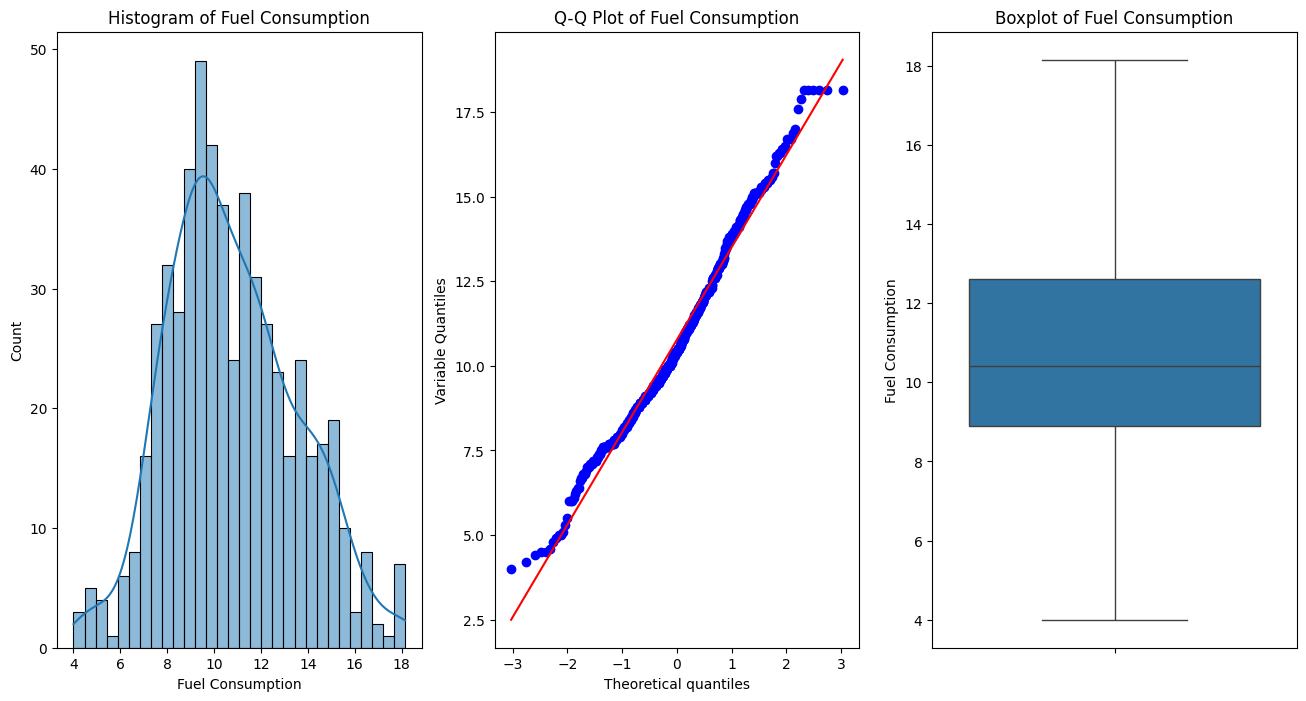

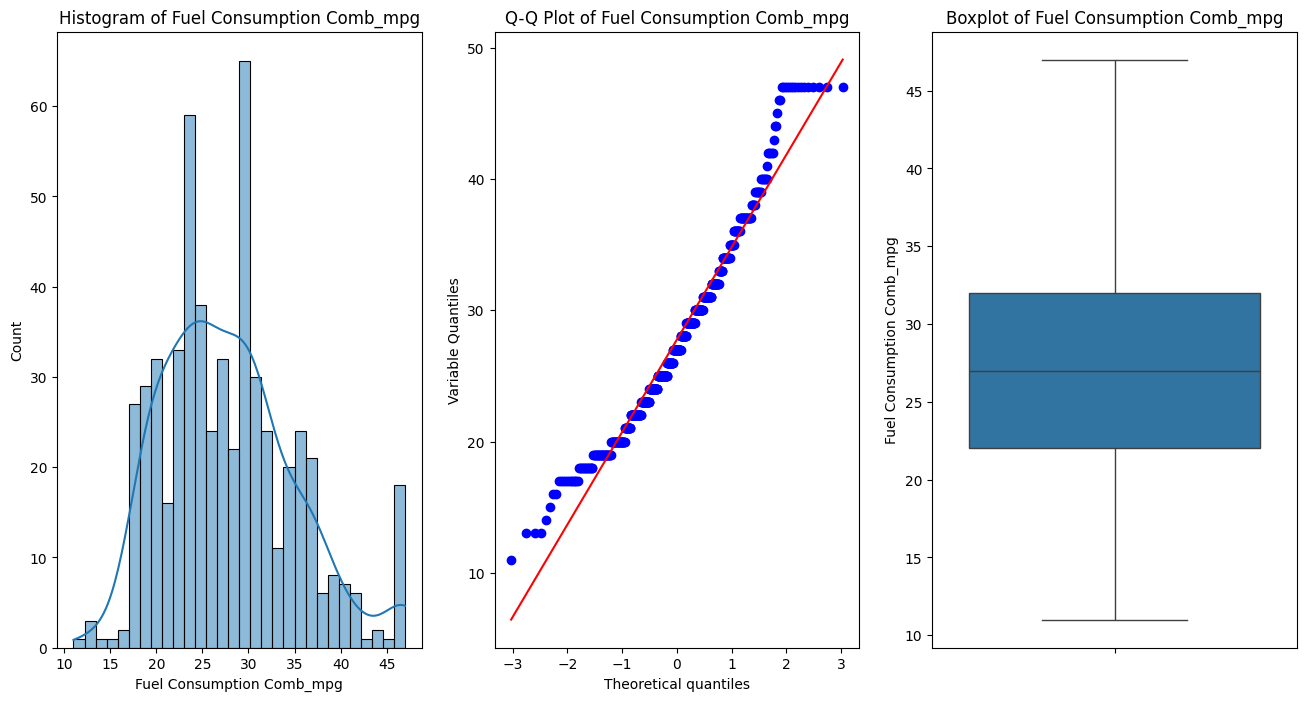

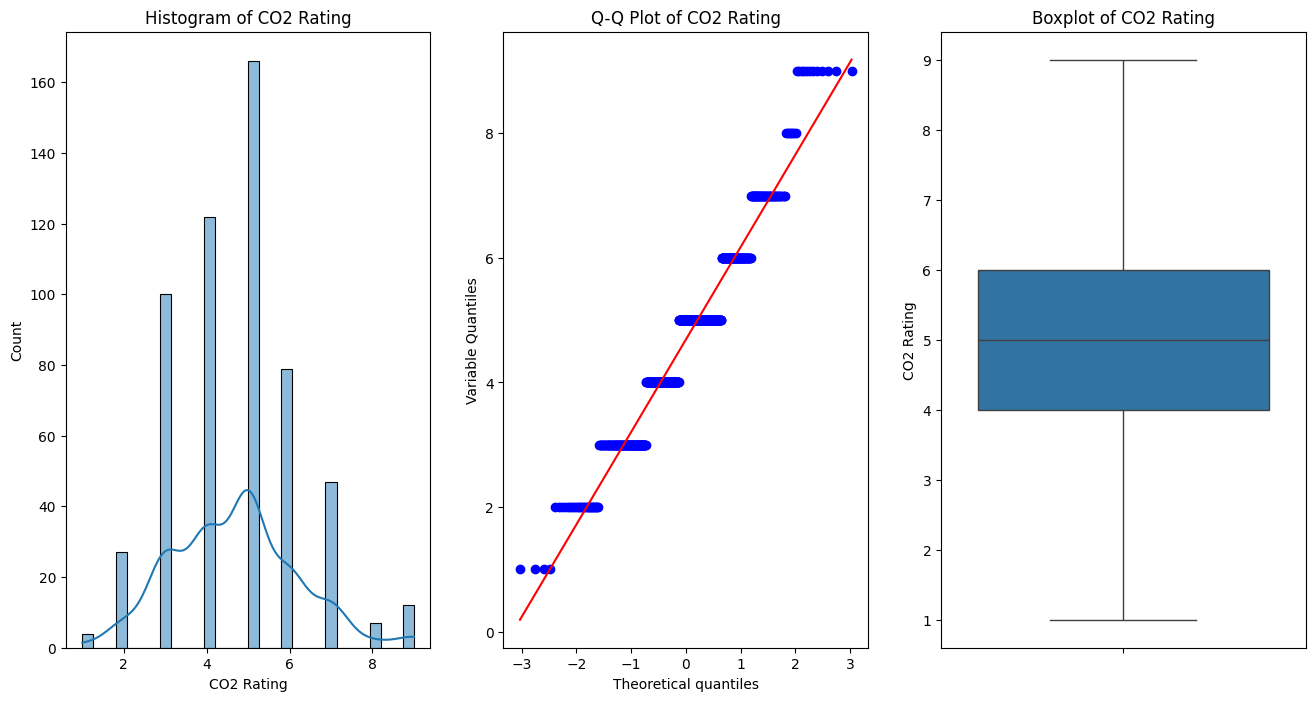

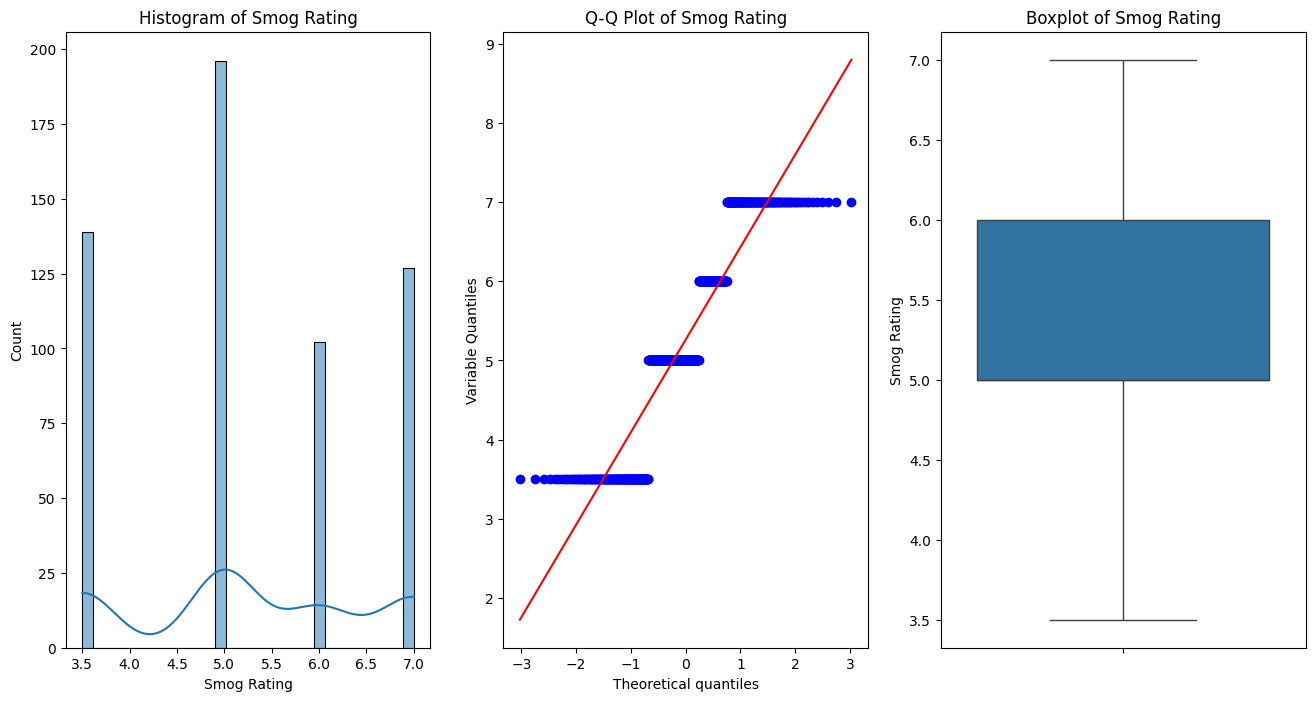

In [242]:
import numpy as np

def iqr_capping(df):
    """
    Menangani outlier dengan IQR Capping.
    Outlier di bawah Q1 - 1.5*IQR akan diganti dengan batas bawah.
    Outlier di atas Q3 + 1.5*IQR akan diganti dengan batas atas.
    """
    df_capped = df.copy()
    Q1 = df_capped.quantile(0.25)
    Q3 = df_capped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped = df_capped.apply(lambda x: np.where(x < lower_bound[x.name], lower_bound[x.name], x))
    df_capped = df_capped.apply(lambda x: np.where(x > upper_bound[x.name], upper_bound[x.name], x))

    return pd.DataFrame(df_capped, columns=df.columns)

# Terapkan IQR Capping ke X_train
X_train[numeric_cols] = iqr_capping(X_train[numeric_cols])

# Visualisasi ulang setelah IQR Capping
for feature in numeric_cols:
    check_plot(X_train, feature)


**ANALISIS**

Pada tahap ini saya menghandle data outlier pada setiap fitur yang telah lolos seleksi. Metode yang saya pakai yakni IQR capping. IQR capping ini menangani outlier tanpa menghapus data.
melainkan Outlier diubah menjadi batas bawah atau atas IQR. Dapat di lihat bahwa handling outlier ini berhasil dari fitur engine size, cylinders, fuel consumption city, fuel consumption city hwy,fuel consumption, fuel consumption comb_mpg, co2 rating dan smog rating yang awalnya memiliki outlier sudah terlihat tidak ada data outlier lagi

# 5. FEATURE SCALING

**Normalisasi dengan metode standar scaller**

In [243]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

**ANALISIS**

Berdasarkakn statistiks deskriptif memiliki nilai min dan nilia man yang sangat jauh yang menandakan memiliki skala nilai yang sangat jauh maka disini saya melakukan standarisasi menggunakan metode standar scaller  dimana metode ini akan merubah data agar memiliki mean sebesar 0 dan standard deviasi sebesar 1

**Menampilkan grafik setelah dan sebelum scalling**

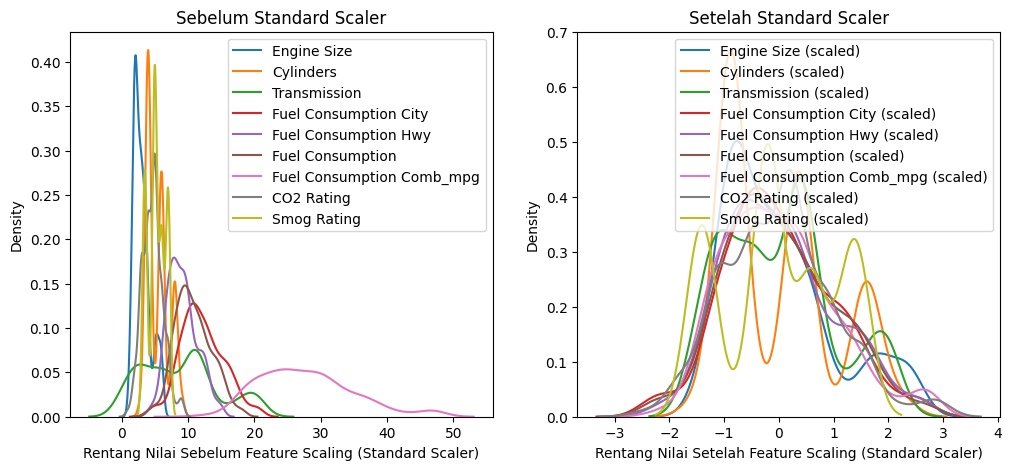

In [244]:
# Menampilkan grafik sebelum dan setelah normalisasi
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Sebelum Standard Scaler')
for col in numeric_cols:
    if col in X_train.columns:
        sns.kdeplot(X_train[col], ax=ax1, label=col)

ax2.set_title('Setelah Standard Scaler')
for col in numeric_cols:
    if col in X_train_scaled.columns:
        sns.kdeplot(X_train_scaled[col], ax=ax2, label=f'{col} (scaled)')

ax1.set_xlabel('Rentang Nilai Sebelum Feature Scaling (Standard Scaler)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scaling (Standard Scaler)')
ax1.legend()
ax2.legend()
plt.show()

**ANALISIS**

Disini saya menampilkan grafik setelah dan sebelum di scaling untuk melihat apakah terjadi perubahan tidak. Berdasarkan output didapatkan bahwa saat sebelum scaling Setiap fitur memiliki skala yang berbeda-beda dan setelah scalling Semua fitur kini berada dalam rentang yang seragam, sekitar -3 hingga 3


# *6. PEMODELAN REGRESI*

# **A. RIDGE**

In [245]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

# Prediksi Ridge
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

# RMSE Ridge
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print("Ridge Regression")
print("RMSE on Training Data:", rmse_train_ridge)
print("RMSE on Testing Data:", rmse_test_ridge)
print()

Ridge Regression
RMSE on Training Data: 12.879326145549724
RMSE on Testing Data: 12.887653394525369



# **ANALISIS**

Pada tahap ini saya melakukan regresi dengan metode Ridge. Hasil dari regresi ini didapatkan bahwa  :
1. RMSE on training : sebesar 12.8
2. RMSE on testing : sebesar 12.88

Nilai RMSE training dan testing memiliki selisih yang kecil namun angka RMSE ini sangat tinggi yang artinya terjadi underfitting


# **B. LASSO**

In [246]:

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

# Prediksi Lasso
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

# RMSE Lasso
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

print("Lasso Regression")
print("RMSE on Training Data:", rmse_train_lasso)
print("RMSE on Testing Data:", rmse_test_lasso)
print()

Lasso Regression
RMSE on Training Data: 13.064849448087823
RMSE on Testing Data: 12.59314504278766



# **ANALISIS**

Pada tahap ini saya melakukan regresi dengan metode Lasso. Hasil dari regresi ini didapatkan bahwa  :
1. RMSE on training : sebesar 13.06
2. RMSE on testing : sebesar 12.59

Nilai RMSE training dan testing memiliki selisih yang kecil namun selihih ini lebih besar dari moetode ridge, namun angka RMSE ini sangat tinggi yang artinya terjadi underfitting


# **C. DECISION TREE REGRESSION**

In [247]:

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Prediksi Decision Tree
y_train_pred_tree = tree_model.predict(X_train_scaled)
y_test_pred_tree = tree_model.predict(X_test_scaled)

# RMSE Decision Tree
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))

print("Decision Tree Regression")
print("RMSE on Training Data:", rmse_train_tree)
print("RMSE on Testing Data:", rmse_test_tree)

Decision Tree Regression
RMSE on Training Data: 0.7145896010104964
RMSE on Testing Data: 6.058656375234589


# **ANALISIS**

Pada tahap ini saya melakukan regresi dengan metode Decision Tree Regression. Hasil dari regresi ini didapatkan bahwa  :
1. RMSE on training : sebesar 0.714
2. RMSE on testing : sebesar 6.0586

Nilai RMSE training dan testing memiliki selisih cukup besar, selisih pada metode decision tree ini meimiliki selisih RMSE training dan RMSE Testing paling tinggi dibandingkan dengan metode ridge dan lasso. namun angka RMSE ini pada training menunjukkan model terlalu bagus untuk data latih sedangkan di data testing RMSE menunjukkan model jauh lebih buruk di data uji. Hal ini menunjukkan terjadi overfitting 


# **KESIMPULAN REGRESI**

Dari ketiga metode ini model yang memberikan hasil terbaik yakni metode Decision Tree Regression. Kemudian yang kedua yakni metode Ridge Regression. Dan model yang memberikan hasil kurang baik yakni metode Lasso regression karena di training  menunjukkan RMSE training ang paling tinggi dibandingkan dengan metode lain.

# **HYPER TUNNING PADA METODE LASSO**

# **A. GRIDE SEARCH PADA LASSO**

In [248]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_grid = {
    'alpha': [1, 2.0, 15.0],  
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-4, 1e-3, 1e-2]    
}


lasso_model = Lasso()


grid_search = GridSearchCV(lasso_model, param_grid,
                            cv=5, scoring='neg_mean_squared_error')




**ANALISIS**
Pada tahap ini saya melakukan hyperparameter tunning pada model Lasso dengan menggunakan metode Grid Search. Untuk hyperparamater tunning ini saya menggunakan 3 parameter yakni :
1. alpha yang menunjukkan penalti 
2. max_iter yang menunjukkan iterasi maksimal
3. tol yang menunjukkan toleransi error

In [249]:
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Parameter Terbaik:", best_params)



Parameter Terbaik: {'alpha': 1, 'max_iter': 1000, 'tol': 0.0001}


**ANALISIS**
Setelah mencari parameter terbaik di langkah sebelumnya, kini didapatkan parameter terbaik pada metode grid search yakni :
1. alpha : 1
2. max_iter : 1000
3. tol : 0.0001

In [250]:
lasso_grid_best = Lasso(**best_params)
lasso_grid_best.fit(X_train_scaled, y_train)
y_train_lasso_pred = lasso_grid_best.predict(X_train_scaled)
y_test_lasso_pred = lasso_grid_best.predict(X_test_scaled)


**ANALISIS**
Setelah mendapatkan parameter terbaik di sini saya melatih ulang model saya dengan parameter terbaik yang telah didapatkan di langkah sebelumnya

In [251]:

rmse_train_lasso_best = np.sqrt(mean_squared_error(y_train, y_train_lasso_pred))
rmse_test_lasso_best = np.sqrt(mean_squared_error(y_test, y_test_lasso_pred))
rmse_gap = abs(rmse_train_lasso_best - rmse_test_lasso_best)
print("RMSE on training set after tuning:", rmse_train_lasso_best)
print("RMSE on testing set after tuning:", rmse_test_lasso_best)
print()
print("RMSE GAP (%): {:.2f}%".format(rmse_gap_percent))

RMSE on training set after tuning: 13.064849448087823
RMSE on testing set after tuning: 12.59314504278766

RMSE GAP (%): 4.48%


**ANALISIS**

Setelah melatih model dengan parameter terbaik di sini saya menampilkan nilai RMSE dari testing dan training setelah di tunning didapatkan bahawa :
1. RMSE training : 13.064849448087823
2. RMSE testing : 12.59314504278766

nilai pada training dan testing setelah tunning tidak mengalami perubahan yang menandakan bahwa tunning ini tidak bisa meningkatkan performa model

C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.532e+01, tolerance: 2.078e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.384e+01, tolerance: 6.564e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

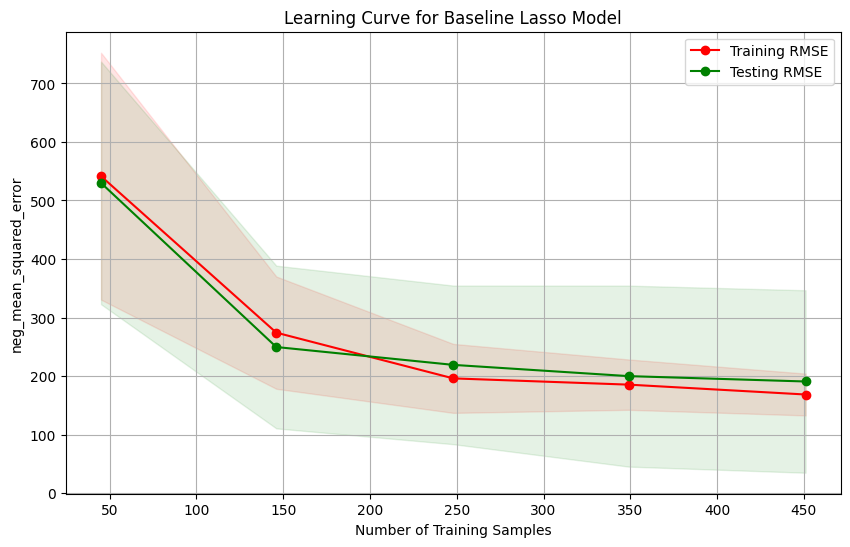

C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.532e+01, tolerance: 2.078e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.384e+01, tolerance: 6.564e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

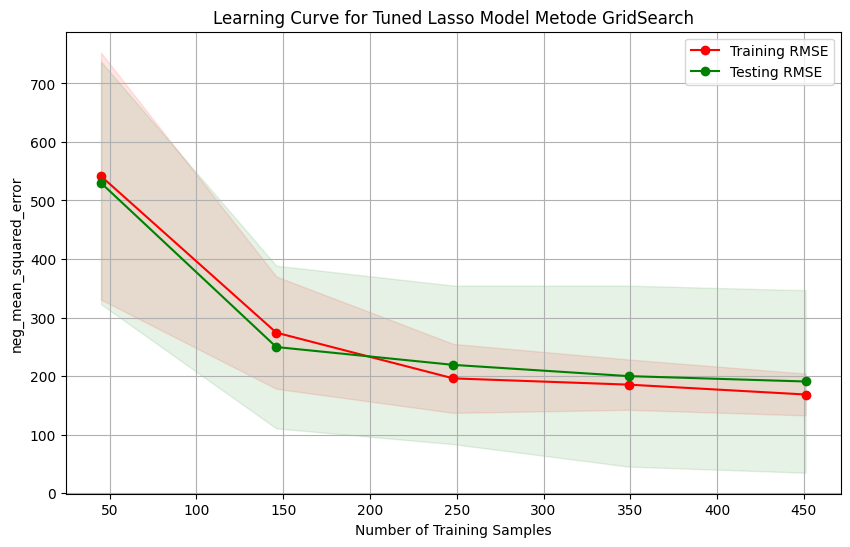

In [252]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Fungsi untuk plot learning curve
def plot_learning_curve(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel("neg_mean_squared_error")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training RMSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing RMSE")

    plt.legend(loc="best")
    plt.show()

# Plot learning curve untuk baseline model Lasso
plot_learning_curve(lasso_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for Baseline Lasso Model")

# Plot learning curve untuk model Lasso setelah tuning
plot_learning_curve(lasso_grid_best, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for Tuned Lasso Model Metode GridSearch")


**ANALISIS**

**A. BASELINE**
1. pada data train seiring bertambahnya data latih, error menurun tajam, terutama antara 50 hingga 150 data.
2. pada data test selisih antara error training dan testing makin kecil seiring bertambahnya data.Polanya mirip dengan garis merah, meskipun sedikit lebih datar.

**B. GRID SEARCH**
1. Nilai RMSE pada trainin dan testing data berdekatan dari titik awal hingga akhir
2. pada trainin dan testing sama-sama memulai di angka tinggi dan turun tajakm di saat 150 data, kedua pola ini sangatlah miritp dan Nilai testing RMSE hampir selalu dekat dengan training RMSE.


# **B. RANDOM SEARCH PADA LASSO**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


param_dist_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'selection': ['cyclic', 'random'],
    'max_iter': [1000, 5000, 10000]
}


lasso_model = Lasso()

lasso_random_search = RandomizedSearchCV(
    estimator=lasso_model,
    param_distributions=param_dist_lasso,
    cv=5,
    scoring='neg_mean_squared_error',
    n_iter=20,
    random_state=42
)


lasso_random_search.fit(X_train_scaled, y_train)
best_params_lasso = lasso_random_search.best_params_
print("Parameter Terbaik (Lasso):", best_params_lasso)


C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.325e+02, tolerance: 1.780e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.724e+03, tolerance: 1.966e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

Parameter Terbaik (Lasso): {'selection': 'random', 'max_iter': 10000, 'alpha': 0.01}


C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.356e+03, tolerance: 1.780e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.769e+03, tolerance: 1.859e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

**ANALISIS**

Pada tahap ini saya melakukan hyperparameter tunning pada model Lasso dengan menggunakan metode Random Search. Untuk hyperparaeter tunning ini saya menggunakan 3 parameter yakni :
1. alpha yang menunjukkan penalti 
2. selection yang menunjukkan cara pemilihan fitur, di sini saya isikan cyclic yang atinya urutan fitur tetap dan random yang menunjukkan urutan fitur akan di acak setiap iterasi
3. max_iter yang menunjukkan jumlah iterasi maksimal

**ANALISIS**

In [254]:
lasso_best = Lasso(**best_params_lasso)
lasso_best.fit(X_train_scaled, y_train)
print("Parameter Terbaik:", lasso_random_search.best_params_)


Parameter Terbaik: {'selection': 'random', 'max_iter': 10000, 'alpha': 0.01}


**ANALISIS**

Setelah melakukan pencarian parameter terbaik didapatkan parameter terbaik pada metode random search yakni :
1. selection : random
2. max_iter : 10000
3. alpha : 0.01

In [255]:
y_train_pred_best = lasso_best.predict(X_train_scaled)
y_test_pred_best = lasso_best.predict(X_test_scaled)

**ANALISIS**

Setelah mendapatkan parameter terbaik, di sini saya akan melatih model random forest saya dengan menggunakan parameter terbaik yang telah didapatkan di tahap sebelumnya.

In [256]:
rmse_train_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
rmse_test_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
rmse_gap_percent = abs(rmse_test_best - rmse_train_best) / rmse_train_best * 100
print("Lasso Regression Setelah Tuning")
print("RMSE on Training Data:", rmse_train_best)
print("RMSE on Testing Data:", rmse_test_best)
print("RMSE GAP (%): {:.2f}%".format(rmse_gap_percent))

Lasso Regression Setelah Tuning
RMSE on Training Data: 12.876480840467247
RMSE on Testing Data: 12.895032164729795
RMSE GAP (%): 0.14%


**ANALISIS**

Setelah melatih model dengan parameter terbaik di sini saya menampilkan nilai RMSE dari testing dan training setelah di tunning didapatkan bahawa :
1. RMSE training : 12.876632780848055
2. RMSE testing : 12.895104241779565

nilai pada training mengalami penurunan dari 13.06 menjadi 12.87 dan untuk testing mengalami kenaikan dari 12.59 menjadi 12.89

gap antara training dan testing sebelum tunning yakni sebesar 0.47 dan gap antara setelah tunning yakni sebesar 0.14%. Gap yang dihasilkan dari tunning lebih kecil menunjukkan model menjadi lebih seimbang dan gap ini kurang dari 20% yang menunjukkan tidak terjadi overfitting

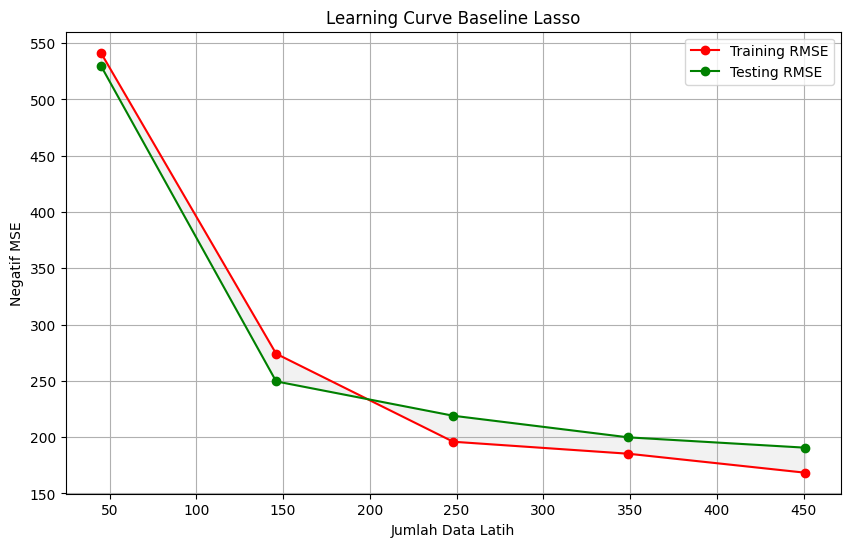

In [257]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training RMSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing RMSE")
    plt.fill_between(train_sizes, train_scores_mean, test_scores_mean, color="gray", alpha=0.1)
    plt.title(title)
    plt.xlabel("Jumlah Data Latih")
    plt.ylabel("Negatif MSE")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curve(Lasso(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', title="Learning Curve Baseline Lasso")


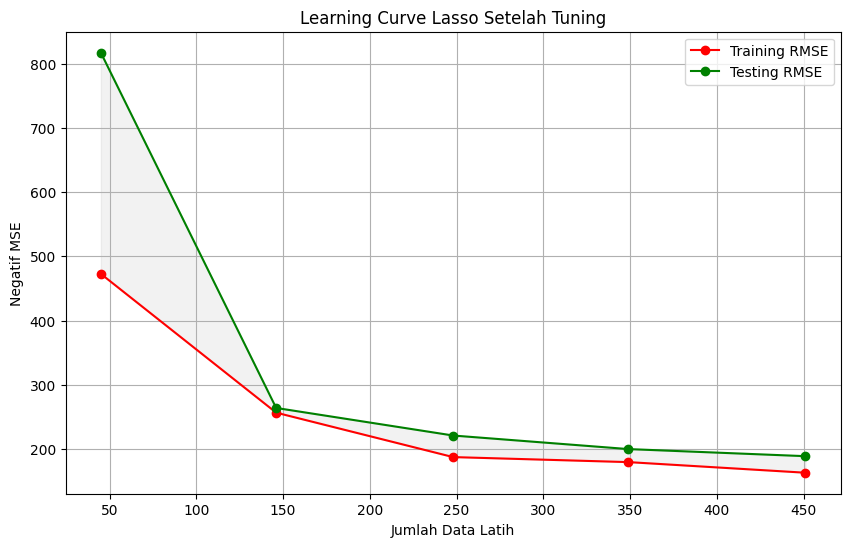

In [258]:
plot_learning_curve(lasso_best, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', title="Learning Curve Lasso Setelah Tuning")


**ANALISIS**

**A. BASELINE**
1. pada data train seiring bertambahnya data latih, error menurun tajam, terutama antara 50 hingga 150 data.
2. pada data test selisih antara error training dan testing makin kecil seiring bertambahnya data.Polanya mirip dengan garis merah, meskipun sedikit lebih datar.

**B. RANDOM SEARCH**
1. Pada data train titik awal dimulai pada data yang tinggi lalu menurun secara signifikan saat data bertambah (di 150).Setelah 150 data, penurunannya lebih lambat dan mulai stabil di sekitar nilai 170-180
2. Pada data tes juga sama dengan data train yakni titik awal di mulai data yang tinggi dan menurutn drastis di 150 dan setelah Setelah 150 data, error testing juga menurun perlahan dan stabil di sekitar nilai 190-200
3. Nilai testing RMSE sangat dekat dengan training RMSE, yang berarti model tidak overfitting dan mampu generalisasi dengan baik ke data baru


# **C. BAYESIAN SEARCH PADA LASSO**

In [ ]:

import numpy as np
np.int = int  
from skopt import BayesSearchCV
from sklearn.linear_model import Lasso
param_lasso = {
    'alpha': (1e-4, 10.0, 'log-uniform'),
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random']
}
lasso = Lasso()

lasso_bayes_search = BayesSearchCV(
    estimator=lasso,
    search_spaces=param_lasso,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=50,
    random_state=42,
    n_jobs=-1,
    refit=True
)

lasso_bayes_search.fit(X_train_scaled, y_train)




C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.444e+03, tolerance: 2.377e+02
  model = cd_fast.enet_coordinate_descent(


BayesSearchCV(cv=5, estimator=Lasso(), n_jobs=-1, random_state=42,
              scoring='neg_mean_squared_error',
              search_spaces={'alpha': (0.0001, 10.0, 'log-uniform'),
                             'fit_intercept': [True, False],
                             'selection': ['cyclic', 'random']})

**ANALISIS**
Pada tahap ini saya melakukan hyperparameter tunning pada model Lasso dengan menggunakan metode bayesian Search. Untuk hyperparameter tunning ini saya menggunakan 3 parameter yakni :
1. alpha yang menunjukkan penalti 
2. fit_intercept yang menunjukkan mencari nilai intercept. Jika true menandakan bahwa Model akan secara otomatis menghitung dan menambahkan nilai intercept (bias) ke dalam model, namun jika false  Model tidak akan menambahkan intercept
3. selection yang urutan data

In [273]:
# Parameter terbaik
best_params_lasso = lasso_bayes_search.best_params_
print("Best Hyperparameters:", best_params_lasso)
# Model terbaik dari hasil tuning
lasso_best_bayes = Lasso(**best_params_lasso)
lasso_best_bayes.fit(X_train_scaled, y_train)

Best Hyperparameters: OrderedDict([('alpha', 0.009550626142890503), ('fit_intercept', True), ('selection', 'random')])


C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.540e+02, tolerance: 2.377e+02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.009550626142890503, selection='random')

**ANALISIS**
Setelah mencari parameter terbaik didapatkan hyperparameter terbaik yakni :
1. alpha :0.009550626142890503
2. fit_intercept : True
3. selection : random

In [261]:
y_train_pred = lasso_best_bayes.predict(X_train_scaled)
y_test_pred = lasso_best_bayes.predict(X_test_scaled)

**ANALISIS**

Setelah mendapatkan hyperparameter selanjutnya saya akna melatih model saya lagi dengan menggunakan parameter terbaik yang telah didapatkan di tahap besar

In [262]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_gap_percent = abs(rmse_test - rmse_train) / rmse_train * 100
print("Lasso Regression - Bayesian Search Tuned")
print("RMSE on Training Set:", rmse_train)
print("RMSE on Testing Set:", rmse_test)
print("RMSE GAP (%): {:.2f}%".format(rmse_gap_percent))

Lasso Regression - Bayesian Search Tuned
RMSE on Training Set: 12.881628411496838
RMSE on Testing Set: 12.900522382372772
RMSE GAP (%): 0.15%


**ANALISIS**

Setelah melatih model dengan parameter terbaik di sini saya menampilkan nilai RMSE dari testing dan training setelah di tunning didapatkan bahawa :
1. RMSE training : 12.881628411496838
2. RMSE testing : 12.900522382372772

nilai pada training mengalami penurunan dari 13.06 menjadi 12.88 dan untuk testing mengalami kenaikan dari 12.59 menjadi 12.9

gap antara training dan testing sebelum tunning yakni sebesar 0.47 dan gap antara setelah tunning yakni sebesar 0.15%. Gap yang dihasilkan dari tunning lebih kecil menunjukkan model menjadi lebih seimbang dan gap ini kurang dari 20% yang menunjukkan tidak terjadi overfitting

In [263]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel("neg_mean_squared_error")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training RMSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing RMSE")

    plt.legend(loc="best")
    plt.show()


C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.532e+01, tolerance: 2.078e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.384e+01, tolerance: 6.564e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

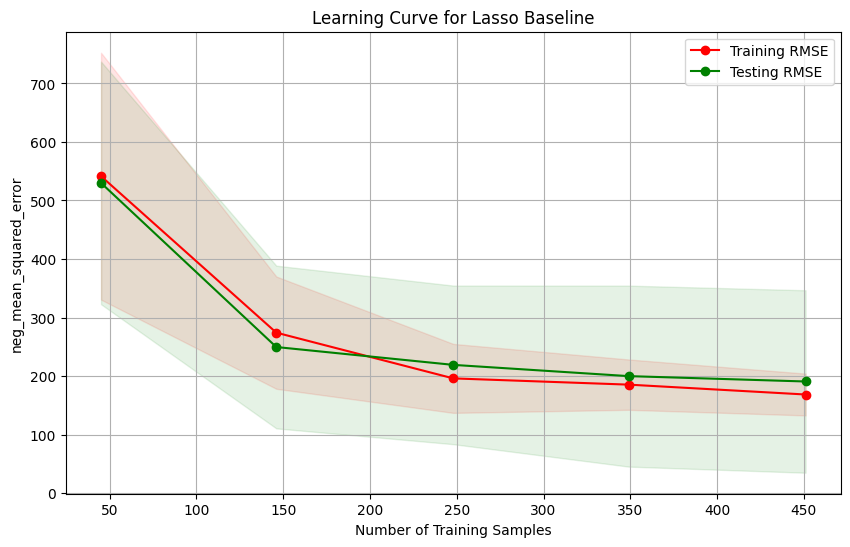

C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.686e+02, tolerance: 2.078e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.419e+02, tolerance: 6.564e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

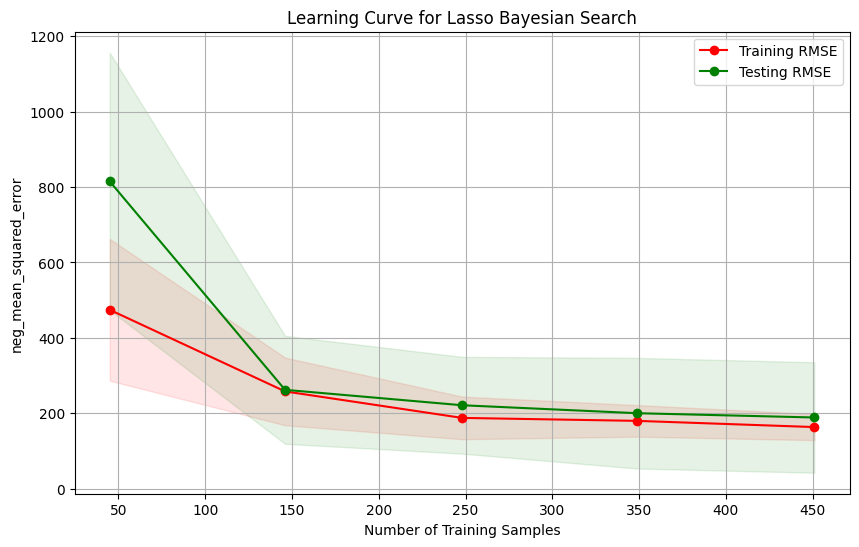

In [264]:
plot_learning_curve(lasso_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for Lasso Baseline")
plot_learning_curve(lasso_best_bayes, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for Lasso Bayesian Search")


**ANALISIS**

**A. BASELINE**
1. pada data train seiring bertambahnya data latih, error menurun tajam, terutama antara 50 hingga 150 data.
2. pada data test selisih antara error training dan testing makin kecil seiring bertambahnya data.Polanya mirip dengan garis merah, meskipun sedikit lebih datar.

**B. BAYESIAN SEARCH**
1. Pada data train titik awal dimulai pada data yang tinggi lalu menurun drastis saat data bertambah (di 150).Setelah 150 data, penurunannya lebih lambat dan mulai stabil di sekitar nilai 170-180
2. Pada data tes juga sama dengan data train yakni titik awal di mulai data yang tinggi dan menurutn drastis di 150 dan setelah Setelah 150 data, error testing juga menurun perlahan dan stabil di sekitar nilai 190-200
3. Nilai testing RMSE sangat dekat dengan training RMSE, yang berarti model tidak overfitting dan mampu generalisasi dengan baik ke data baru


# **D. OPTUNA PADA LASSO**

In [265]:
import optuna

In [ ]:
def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 10.0, log=True)
    selection = trial.suggest_categorical('selection', ['cyclic', 'random'])
    max_iter = trial.suggest_int('max_iter', 100, 10000)

    model = Lasso(alpha=alpha, selection=selection, max_iter=max_iter)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    return mean_squared_error(y_test, y_pred)

study = optuna.create_study(direction='minimize')  
study.optimize(objective, n_trials=100)

[I 2025-04-16 19:32:08,542] A new study created in memory with name: no-name-b6e6d925-ba1d-46c7-afed-5f89289409f7
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.409e+04, tolerance: 2.377e+02
  model = cd_fast.enet_coordinate_descent(
[I 2025-04-16 19:32:08,559] Trial 0 finished with value: 166.85100430476908 and parameters: {'alpha': 0.00033893383011332967, 'selection': 'cyclic', 'max_iter': 5231}. Best is trial 0 with value: 166.85100430476908.
[I 2025-04-16 19:32:08,565] Trial 1 finished with value: 159.14989410879895 and parameters: {'alpha': 0.7931364132827754, 'selection': 'cyclic', 'max_iter': 8913}. Best is trial 1 with value: 159.14989410879895.
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coo

**ANALISIS**
Pada tahap ini saya melakukan hyperparameter tunning pada model Lasso dengan menggunakan metode optuna . Untuk hyperparameter tunning ini saya menggunakan 3 parameter yakni :
1. alpha yang menunjukkan penalti 
2. max_iter yang menunjukkan iterasi maksimal
3. selection yang menunjukkan jumlah maksimal iterasi

In [267]:
best_params = study.best_params
best_score = study.best_value

print(f"Best Parameters: {best_params}")
print(f"Best Mean Squared Error: {best_score}")

Best Parameters: {'alpha': 1.5377626115986358, 'selection': 'random', 'max_iter': 3764}
Best Mean Squared Error: 157.36811157391395


**ANALISIS**

Setelah mencari parameter terbaik didapatkan parameter terbaik yakni :
1. alpha :  1.5377626115986358
2. selection :random
3. max_iter : 3764

In [268]:
lasso_optuna = Lasso(**best_params)
lasso_optuna.fit(X_train_scaled, y_train)

Lasso(alpha=1.5377626115986358, max_iter=3764, selection='random')

In [269]:
y_train_optuna = lasso_optuna.predict(X_train_scaled)
y_test_optuna = lasso_optuna.predict(X_test_scaled)

**ANALISIS**

Setelah mendapatkan parameter terbaik disini saya akan melatih model saya dengan parameter terbaik yang telah ditemukan ditahap sebelumnya

In [270]:
rmse_train_optuna = np.sqrt(mean_squared_error(y_train, y_train_optuna))
rmse_test_optuna = np.sqrt(mean_squared_error(y_test, y_test_optuna))
rmse_gap_percent = abs(rmse_test_optuna - rmse_train_optuna) / rmse_train_optuna * 100
print("Lasso Regression (After Optuna Tuning)")
print("RMSE on Training Data:", rmse_train_optuna)
print("RMSE on Testing Data:", rmse_test_optuna)
print("RMSE GAP (%): {:.2f}%".format(rmse_gap_percent))

Lasso Regression (After Optuna Tuning)
RMSE on Training Data: 13.146978417197063
RMSE on Testing Data: 12.554682066755573
RMSE GAP (%): 4.51%


**ANALISIS**

Setelah melatih model dengan parameter terbaik di sini saya menampilkan nilai RMSE dari testing dan training setelah di tunning didapatkan bahawa :
1. RMSE training :  13.146978417197063
2. RMSE testing : 12.554682066755573

nilai pada training mengalami kenaikan  dari 13.06 menjadi 13.14 dan untuk testing juga mengalami kenaikan dari 12.59 menjadi 12.55

gap antara training dan testing sebelum tunning yakni sebesar 0.47 dan gap antara setelah tunning yakni sebesar 4.51%. Gap yang dihasilkan dari tunning lebih besar, gap yang dihasilkan masih di bawah 20% yang menandakan tidak terjadi overfitting

In [271]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel("neg_mean_squared_error")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training RMSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing RMSE")

    plt.legend(loc="best")
    plt.show()


C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.532e+01, tolerance: 2.078e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.384e+01, tolerance: 6.564e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

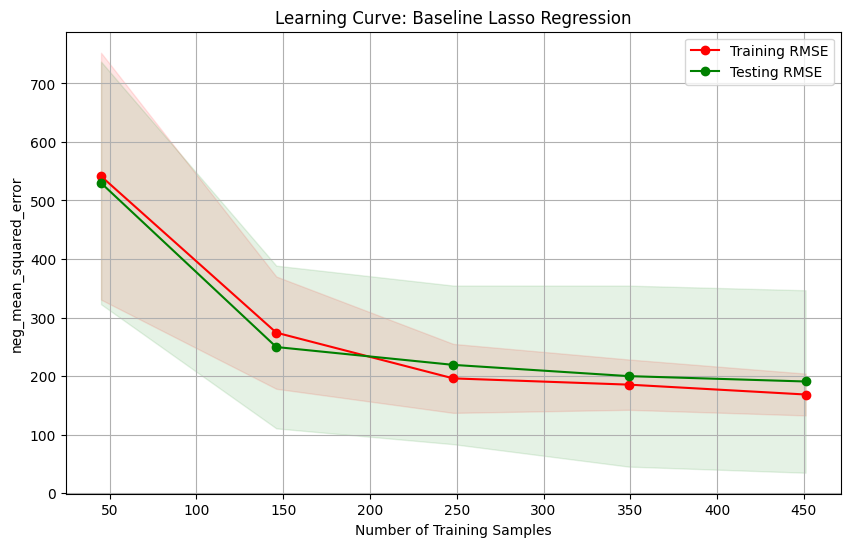

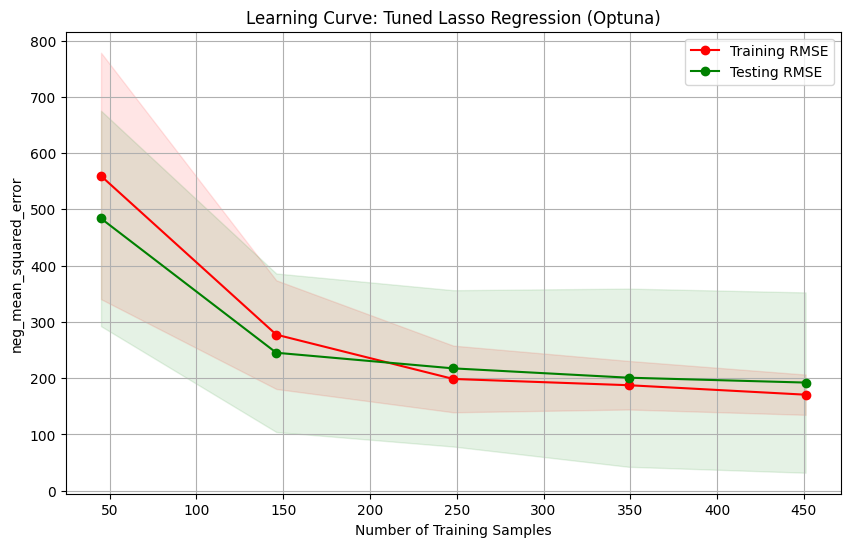

In [272]:
# Learning Curve Baseline
plot_learning_curve(Lasso(), X_train_scaled, y_train, cv=5,
                    scoring='neg_mean_squared_error',
                    title="Learning Curve: Baseline Lasso Regression")

# Learning Curve Setelah Optuna
plot_learning_curve(Lasso(**best_params), X_train_scaled, y_train, cv=5,
                    scoring='neg_mean_squared_error',
                    title="Learning Curve: Tuned Lasso Regression (Optuna)")


**ANALISIS**

**A. BASELINE**
1. pada data train seiring bertambahnya data latih, error menurun tajam, terutama antara 50 hingga 150 data.
2. pada data test selisih antara error training dan testing makin kecil seiring bertambahnya data.Polanya mirip dengan garis merah, meskipun sedikit lebih datar.

**B. OPTUNA SEARCH**
1. Hasil yang didapatkan di optuna hampir sama dengan yang dihasilnya oleh bayesian yakni pada data training dan data tes dimulai dengan nilai yang cukup tinggi (sekitar 560), lalu turun tajam pada data 150  
2. Selisih nilai RMSE antar training dan testing kecil dan stabil, menandakan model sudah cukup optimal.


# **KESIMPULAN HAYPERPARAMETER TUNNNING PADA MODEL REGRESI LASSO**

Berdasarkan dari 4 jenis hyperparameter tunning didapatkan bahwa jenis hyperparameter tunning terbaik didapatkan dari hasil metode random search dengan nilai :
1. RMSE - Train: 12.8766
2.  RMSE Test: 12.8951
3. RMSE Gap (percent)    : 0.14%

nilai RMSE pada data tes ini nilai tes tertinggi dibandingkan dari ketiga metode lainya yakni gris search, bayesian search dan optuna dan  gap antara tuning dan testing paling rendah dibandingkan 3 metode tunning lainnya. Gap ini masih di bawah 20% yang menandakan tidak terjadi indikasi overfitting